In [ ]:

import os
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, f1_score, precision_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


Add time to each data set and need to match with button click event on tag file

In [ ]:

# Add time spam to each data set

def add_timespamtodataset(df,count):

  df_timestamp = df.iloc[0, 0]
  df_rate = df.iloc[1, 0]  
  #print(df_timestamp)
  #print(df_rate)
  n_df = pd.DataFrame(df.iloc[2:].values, columns=df.columns)  
  n_df['id'] = count 
  n_df['timespam'] = [(df_timestamp + i / df_rate) for i in range(len(n_df))]
    
  return n_df


In [ ]:
# Document Name as array

document_name= ["ACC","BVP","EDA","HR","TEMP"] 
document_name=np.asarray(document_name)

#Define dataframe for each document

df_acc  =""
df_tags =""
df_bvp  =""
df_eda  =""
df_hr   =""
df_ibi  ="" 
df_temp =""

# skipthe data set 1. all the data not available in same time spam

for x in range(2,36):   #chamge the value and select some files Otherwise data loading take more time
    #print(x) 
    for i in document_name:
        #print(i)
        
        file_path ="https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/"
        
        if i == "tags" :
            
            if x > 9:
                
                file_path = file_path + "S" + str(x) + "/" + i + "_S" + str(x) + ".csv"
                
            else:
                
                file_path = file_path + "S" + ("0" + str(x)) +"/" + i + "_S" + ("0" + str(x)) +".csv"            
             
            if len(df_tags) == 0:
                
                df_tags = pd.read_csv(file_path, on_bad_lines='skip', header = None , skiprows=[0,1])
                
            else :
                # Concat all the data into one column with axis =0
                df_tags= pd.concat([ pd.read_csv(file_path, on_bad_lines='skip' , header= None ) , df_tags ] ,axis=0 )           
                     
        else :                      
                
            if x > 9: 
                
                file_path = file_path + "S" + str(x) + "/" + i +".csv"
                
            else :
                
                file_path = file_path + "S" + ("0" + str(x)) + "/" + i + ".csv"
            
            if i == "ACC" :
                if len(df_acc) == 0:
                    names = ['X','Y','Z']
                    df_acc = pd.read_csv(file_path, on_bad_lines='skip' , header= None , names=names )                     
                    df_acc = add_timespamtodataset(df_acc , x )                   
                    
                else :
                    
                    names = ['X','Y','Z']
                    df_other = pd.read_csv(file_path, on_bad_lines='skip' , header= None , names=names )                                
                    df_other = add_timespamtodataset(df_other , x )
                    df_acc= pd.concat ([ df_other , df_acc ]  ,axis=0  )                    
                     
            if i == "BVP" :                
                if len(df_bvp) == 0:
                    
                    names = ['BVP']
                    df_bvp = pd.read_csv(file_path, on_bad_lines='skip' , header= None , names=names )
                    df_bvp = add_timespamtodataset(df_bvp , x )                                           
                     
                else :     
                    names = ['BVP']
                    df_other = pd.read_csv(file_path, on_bad_lines='skip' , header= None , names=names  )
                    df_other = add_timespamtodataset(df_other , x )
                    df_bvp= pd.concat( [ df_other , df_bvp ] ,axis=0 )                     
                     
            if i == "EDA" :
                if len(df_eda) == 0:
                    
                    names = ['EDA']
                    df_eda = pd.read_csv(file_path, on_bad_lines='skip' , header= None , names=names)
                    df_eda = add_timespamtodataset(df_eda , x )  
                    
                else :
                    
                    names = ['EDA']
                    df_other = pd.read_csv(file_path, on_bad_lines='skip' , header= None , names=names  )
                    df_other = add_timespamtodataset(df_other , x )
                    df_eda= pd.concat ([ df_other , df_eda] ,axis=0 )
                    
            if i == "HR" :                
                if len(df_hr) == 0:
                    
                    names = ['HR']
                    df_hr = pd.read_csv(file_path, on_bad_lines='skip', header= None , names=names)
                    df_hr = add_timespamtodataset(df_hr , x )  
                    
                else :                    
                    names = ['HR']
                    
                    df_other = pd.read_csv(file_path, on_bad_lines='skip' , header= None , names=names  )
                    df_other = add_timespamtodataset(df_other , x )
                    df_hr= pd.concat ([ df_other , df_hr] ,axis=0 )
                    
                    
            # print(file_path)
            if i == "TEMP" :
                
                if len(df_temp) == 0:
                    
                    names = ['TEMP']
                    df_temp = pd.read_csv(file_path, on_bad_lines='skip', header= None , names=names )
                    df_temp = add_timespamtodataset(df_temp , x )
                    
                else :
                    
                    names = ['TEMP']
                    df_other = pd.read_csv(file_path, on_bad_lines='skip' , header= None , names=names  )
                    df_other = add_timespamtodataset(df_other , x )
                    df_temp= pd.concat ([ df_other , df_temp] ,axis=0 )
                    
print('All the Data sets Imported')

All the Data sets Imported


In [ ]:
#  Merge Data Set into single data frame

def merge_dataset(x):
    
    columns=['X', 'Y', 'Z','BVP', 'EDA', 'HR', 'TEMP',  'timespam']
    
    df_merge=pd.DataFrame(columns=columns)

    bvp_id = df_bvp[df_bvp['id'] == x]
    acc_id = df_acc[df_acc['id'] == x].drop(['id'], axis=1)
    eda_id = df_eda[df_eda['id'] == x].drop(['id'], axis=1)
    hr_id = df_hr[df_hr['id'] == x].drop(['id'], axis=1)
    temp_id = df_temp[df_temp['id'] == x].drop(['id'], axis=1)

     
    df_merge = pd.merge(acc_id, bvp_id, on='timespam'  , how='outer')
    df_merge = pd.merge(df_merge, eda_id, on='timespam'  , how='outer')
    df_merge = pd.merge(df_merge, hr_id, on='timespam'  , how='outer')
    df_merge = pd.merge(df_merge, temp_id, on='timespam'  , how='outer')

    df_merge.fillna(method='ffill', inplace=True) # fill NAN by foarward filling method
    df_merge.fillna(method='bfill', inplace=True) # fill NAN by backward filling method
    
    
    return df_merge

In [ ]:
# Merger all the data into one single data frame and remove the NAN values by forward filling method and backward filling method

merge_df = pd.DataFrame()

for i in range(2,36):

    if len(merge_df) == 0:
       merge_df = merge_dataset(i)

    else:
       merge_df = pd.concat([merge_df, merge_dataset(i)], axis=0 )
print('Data set merged')

Data set merged


In [ ]:
merge_df['Label'] = pd.Series(dtype='int') # Add label column to merge data set to match the output 1 or 0 according to the stress
print(merge_df)



           X     Y     Z      timespam    BVP    id       EDA     HR   TEMP  \
0        2.0  10.0  63.0  1.644228e+09  -0.00   2.0  0.000000  118.0  34.79   
1        4.0  12.0  66.0  1.644228e+09  -0.00   2.0  0.000000  118.0  34.79   
2       -1.0  13.0  63.0  1.644228e+09  -0.00   2.0  0.000000  118.0  34.79   
3       -7.0  11.0  59.0  1.644228e+09  -0.00   2.0  0.000000  118.0  34.79   
4       -7.0   6.0  57.0  1.644228e+09  -0.00   2.0  0.000000  118.0  34.79   
...      ...   ...   ...           ...    ...   ...       ...    ...    ...   
225490 -17.0   1.0  61.0  1.646842e+09 -94.24  35.0  0.229625   65.5  32.21   
225491 -17.0   1.0  61.0  1.646842e+09 -94.24  35.0  0.229625   65.5  32.21   
225492 -17.0   1.0  61.0  1.646842e+09 -94.24  35.0  0.228344   65.5  32.21   
225493 -17.0   1.0  61.0  1.646842e+09 -94.24  35.0  0.229625   65.5  32.21   
225494 -17.0   1.0  61.0  1.646842e+09 -94.24  35.0  0.228344   65.5  32.21   

        Label  
0         NaN  
1         NaN  
2  

In [ ]:
# Get the all data into different data frames and analyse the data for all the subjects 

df_2 =merge_df.loc[merge_df['id'] == 2]
df_3 =merge_df.loc[merge_df['id'] == 3]
df_4 =merge_df.loc[merge_df['id'] == 4]
df_5 =merge_df.loc[merge_df['id'] == 5]
df_6 =merge_df.loc[merge_df['id'] == 6]
df_7 =merge_df.loc[merge_df['id'] == 7]
df_8 =merge_df.loc[merge_df['id'] == 8]
df_9 =merge_df.loc[merge_df['id'] == 9]
df_10 =merge_df.loc[merge_df['id'] == 10]
df_11 =merge_df.loc[merge_df['id'] == 11]
df_12 =merge_df.loc[merge_df['id'] == 12]
df_13 =merge_df.loc[merge_df['id'] == 13]
df_14 =merge_df.loc[merge_df['id'] == 14]
df_15 =merge_df.loc[merge_df['id'] == 15]
df_16 =merge_df.loc[merge_df['id'] == 16]
df_17 =merge_df.loc[merge_df['id'] == 17]
df_18 =merge_df.loc[merge_df['id'] == 18]
df_19 =merge_df.loc[merge_df['id'] == 19]
df_20 =merge_df.loc[merge_df['id'] == 20]
df_21 =merge_df.loc[merge_df['id'] == 21]
df_22 =merge_df.loc[merge_df['id'] == 22]
df_23 =merge_df.loc[merge_df['id'] == 23]
df_24 =merge_df.loc[merge_df['id'] == 24]
df_25 =merge_df.loc[merge_df['id'] == 25]
df_26 =merge_df.loc[merge_df['id'] == 26]
df_27 =merge_df.loc[merge_df['id'] == 27]
df_28 =merge_df.loc[merge_df['id'] == 28]
df_29 =merge_df.loc[merge_df['id'] == 29]
df_30 =merge_df.loc[merge_df['id'] == 30]
df_31 =merge_df.loc[merge_df['id'] == 31]
df_32 =merge_df.loc[merge_df['id'] == 32]
df_33 =merge_df.loc[merge_df['id'] == 33]
df_34 =merge_df.loc[merge_df['id'] == 34]
df_35 =merge_df.loc[merge_df['id'] == 35]

In [ ]:
# Function for remove outliers by hampel filtering method

def hampel_filter(df, column, window_size=3, n_sigma=3):
   
    rolling_median = df[column].rolling(window_size, center=True).median()
    deviation = np.abs(df[column] - rolling_median)
    median_deviation = deviation.rolling(window_size, center=True).median()
    threshold = n_sigma * median_deviation
    outlier_idx = deviation > threshold
    df.loc[outlier_idx, column] = rolling_median[outlier_idx]
    return df



In [ ]:
# match output to the lable column according to the time tag values as 0 and 1 
def match_label(df,x):

  file_path=''
  

  file_path = "https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/"

  if x > 9:
                
    file_path = file_path + "S" + str(x) + "/" + 'tags' + "_S" + str(x) + ".csv"
  else:
            
    file_path = file_path + "S" + ("0" + str(x)) +"/" + 'tags' + "_S" + ("0" + str(x)) +".csv"         
          
  df_tags = pd.read_csv(file_path, on_bad_lines='skip', header = None )
  print(file_path) 
  tag = df_tags.values 
  value_if_true =1
  value_if_false =0 
  #print(tag)
  for i in range(len(tag)):
     
    if i == 0:     

      df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
      
      df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
      
    else:
      if i == len(tag)-1:
        
        df.loc[(df["id"].values == x) & (df['timespam'].values >= tag[i])  , "Label"] = value_if_true
        
      else :
        
        df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
        

      if value_if_true ==1:
        value_if_true =0
        value_if_false =1
      else:
        value_if_true =1
        value_if_false=0
    
  #print(dfname)
  #filename =filename+'.csv'
  #dfname.to_csv(filename)

print('Label Matching Completed')

Label Matching Completed


In [ ]:
# Function for detect the outliers and lable matching

document_name= ["X","Y","Z","BVP","EDA","HR","TEMP"] 
document_name=np.asarray(document_name)

for x in range(2,36):
  dfname ='df_' + str(x)
  df = globals()[dfname]

  for i in document_name:
    df= hampel_filter(df,str(i),3,3)

  match_label(df,x)

<ipython-input-12-596d7f87ea1a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[outlier_idx, column] = rolling_median[outlier_idx]


https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S02/tags_S02.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S03/tags_S03.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S04/tags_S04.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S05/tags_S05.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S06/tags_S06.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S07/tags_S07.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S08/tags_S08.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S09/tags_S09.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S10/tags_S10.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S11/tags_S11.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S12/tags_S12.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S13/tags_S13.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S14/tags_S14.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S15/tags_S15.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S16/tags_S16.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S17/tags_S17.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S18/tags_S18.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S19/tags_S19.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S20/tags_S20.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S21/tags_S21.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S22/tags_S22.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S23/tags_S23.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S24/tags_S24.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S25/tags_S25.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S26/tags_S26.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S27/tags_S27.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S28/tags_S28.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S29/tags_S29.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S30/tags_S30.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S31/tags_S31.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S32/tags_S32.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S33/tags_S33.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S34/tags_S34.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/S35/tags_S35.csv


<ipython-input-15-ddeae7d9ead5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df["id"].values == x) & (df['timespam'].values < tag[i]) , "Label"] =0
<ipython-input-15-ddeae7d9ead5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ (df["id"].values == x) & (df['timespam'].values >= tag[i]) & (df['timespam'].values < tag[i+1]) , "Label"] =value_if_true
<ipython-input-15-ddeae7d9ead5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [ ]:
# function for plot the data

def plot(df):
  fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
  fig.tight_layout(pad=2.0)
  ax[0,0].set_title('X')
  ax[0,0].plot( df['timespam'],df['X'], label='Line 2')
  ax[0,1].set_title('Y')
  ax[0,1].plot( df['timespam'],df['X'], label='Line 2')
  ax[0,2].set_title('Z')
  ax[0,2].plot( df['timespam'],df['Z'], label='Line 2')
  ax[1,0].set_title('BVP')
  ax[1,0].plot( df['timespam'],df['BVP'], label='Line 2')
  ax[1,1].set_title('HR')
  ax[1,1].plot( df['timespam'],df['HR'], label='Line 2')
  ax[1,2].set_title('TEMP')
  ax[1,2].plot( df['timespam'],df['TEMP'], label='Line 2')

  #plt.show()


In [ ]:
data = {'ID': [],'Subject_ID': [],'MSE': [], 'F1 Score': [], 'Precision': [], 'Accuracy': [],'Accuracy Scores':[],'Mean Accuracy':[]}

In [ ]:
# function for train the model and analyse the perpormance evaluation of the model. I have get the cross validation scores also here

def train_randomforestmodel(df, subject_id,id):
 
  X= df.iloc[:,:-1]
  Y= df.iloc[:,-1]

   
  # split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

  # train a random forest model on the training data
  rf = RandomForestClassifier(n_estimators=100)
  rf.fit(X_train, y_train)

  # get the cross validation scores
  scores = cross_val_score(rf, X, Y, cv=10)

  # make predictions on the test data
  y_pred = rf.predict(X_test)

  # Generate the   feature importances
  feature_importances = rf.feature_importances_

  # create a dataframe to store the feature importances
  importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

  # sort the dataframe by feature importance in descending order
  importance_df = importance_df.sort_values(by='Importance', ascending=False)

  print ('feature importances')
  print (importance_df)

  # Plot a bar graph of the feature importances
  plt.figure(figsize=(6, 4))

  plt.bar(importance_df["Feature"], importance_df["Importance"] , width=0.3)
  plt.xticks(rotation=90)
  plt.xlabel("Feature")
  plt.ylabel("Importance")
  plt.title("Random Forest Feature Importances")
  plt.show()


  print('')
  # calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)

  # calculate the F1 score
  f1 = f1_score(y_test, y_pred)

  # calculate the precision
  precision = precision_score(y_test, y_pred)

  # calculate the accuracy
  accuracy = accuracy_score(y_test, y_pred)

  # calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  data['ID'].append(id)
  data['Subject_ID'].append(subject_id)
  data['MSE'].append(mse)
  data['F1 Score'].append(f1)
  data['Precision'].append(precision)
  data['Accuracy'].append(accuracy)
  data['Accuracy Scores'].append(scores)
  data['Mean Accuracy'].append(scores.mean())
  # print the results
  print('Accuracy Scores: ', scores)
  print('Mean Accuracy: ', scores.mean())
  print("Mean squared error:", mse)
  print("F1 score:", f1)
  print("Precision:", precision)
  print("Accuracy:", accuracy)
  print("Confusion matrix:")
  print(cm)



In [29]:
# function for train by BVP and HR under feature importance

def train_randomforestmodel_withBVP(df, subject_id,id):
 
  X = df[['BVP', 'HR']]
  Y = df['Label']

   
  # split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

  # train a random forest model on the training data
  rf = RandomForestClassifier(n_estimators=100)
  rf.fit(X_train, y_train)

  # get the cross validation scores
  scores = cross_val_score(rf, X, Y, cv=5)

  # make predictions on the test data
  y_pred = rf.predict(X_test)

  # Generate the   feature importances
  feature_importances = rf.feature_importances_

  # create a dataframe to store the feature importances
  importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

  # sort the dataframe by feature importance in descending order
  importance_df = importance_df.sort_values(by='Importance', ascending=False)

  print ('feature importances')
  print (importance_df)

  # Plot a bar graph of the feature importances
  plt.figure(figsize=(6, 4))

  plt.bar(importance_df["Feature"], importance_df["Importance"] , width=0.3)
  plt.xticks(rotation=90)
  plt.xlabel("Feature")
  plt.ylabel("Importance")
  plt.title("Random Forest Feature Importances")
  plt.show()


  print('')
  # calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)

  # calculate the F1 score
  f1 = f1_score(y_test, y_pred)

  # calculate the precision
  precision = precision_score(y_test, y_pred)

  # calculate the accuracy
  accuracy = accuracy_score(y_test, y_pred)

  # calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  data['ID'].append(id)
  data['Subject_ID'].append(subject_id)
  data['MSE'].append(mse)
  data['F1 Score'].append(f1)
  data['Precision'].append(precision)
  data['Accuracy'].append(accuracy)
  data['Accuracy Scores'].append(scores)
  data['Mean Accuracy'].append(scores.mean())
  # print the results
  print('Accuracy Scores: ', scores)
  print('Mean Accuracy: ', scores.mean())
  print("Mean squared error:", mse)
  print("F1 score:", f1)
  print("Precision:", precision)
  print("Accuracy:", accuracy)
  print("Confusion matrix:")
  print(cm)

In [ ]:
# function for analyse the data . Call the plot function and train model function
def analyse_data(df,subject_id,id):
  #df = df.drop("Unnamed: 0", axis=1)
  plot(df)
  print('')

  df = df.drop(columns=["id", "timespam"])

  corr= df.corr()   
  print(corr['Label'])
  print('')

  train_randomforestmodel(df,subject_id,id)
  print('')

 # df = df.drop(['datetime','id' ] )
  plt.figure(figsize=(4, 3))
  df["Label"].value_counts()
  df["Label"].value_counts().plot(kind="bar",color=["salmon","deeppink"]) 
  
  plt.xticks(np.arange(2), ('Stressed', 'Not Stressed'),rotation=0 );



X        0.133585
Y        0.135832
Z        0.231141
BVP     -0.000525
EDA      0.119980
HR      -0.169441
TEMP    -0.030754
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.326328
0       X    0.174323
4     EDA    0.114308
1       Y    0.111385
5      HR    0.092190
6    TEMP    0.091230
2       Z    0.090238


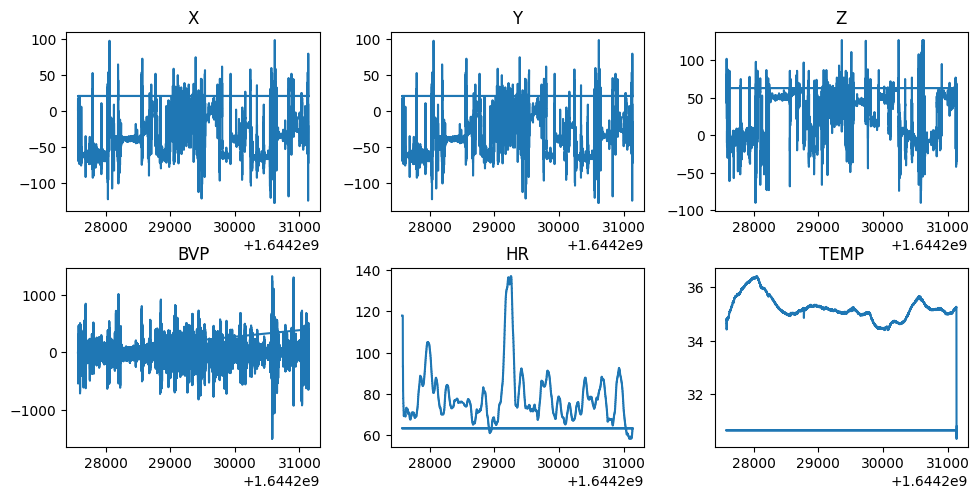

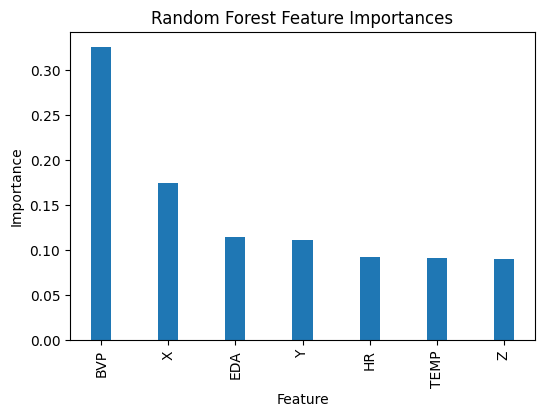


Accuracy Scores:  [0.40527215 0.37028596 0.45208721 0.50886381 0.49983565]
Mean Accuracy:  0.4472689590351548
Mean squared error: 0.21930055219563502
F1 score: 0.7889676113360323
Precision: 0.7806058582992573
Accuracy: 0.780699447804365
Confusion matrix:
[[16920  5258]
 [ 4750 18708]]



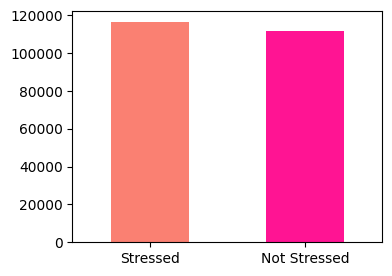

In [30]:
analyse_data(df_2, 'S2',2)

feature importances
  Feature  Importance
0     BVP    0.592958
1      HR    0.407042


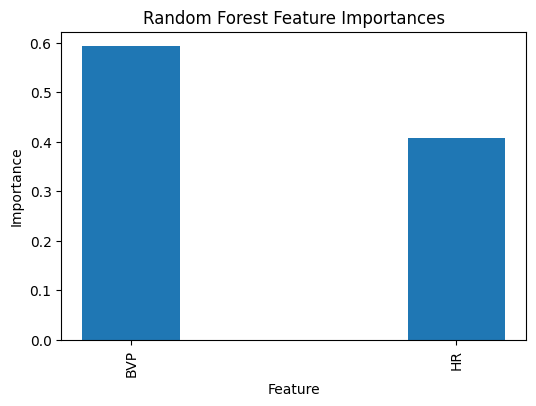


Accuracy Scores:  [0.49658165 0.51598554 0.43166429 0.50871042 0.50005478]
Mean Accuracy:  0.4905993356781152
Mean squared error: 0.3152116749934262
F1 score: 0.6945665329001848
Precision: 0.6861601711624785
Accuracy: 0.6847883250065737
Confusion matrix:
[[14895  7481]
 [ 6904 16356]]


In [27]:
train_randomforestmodel_withBVP(df_2, 'S2',2)


X       -0.040442
Y       -0.128113
Z       -0.089204
BVP     -0.000527
EDA     -0.079362
HR      -0.050181
TEMP     0.003530
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.314799
4     EDA    0.191750
5      HR    0.132250
1       Y    0.126172
6    TEMP    0.109439
0       X    0.071821
2       Z    0.053769


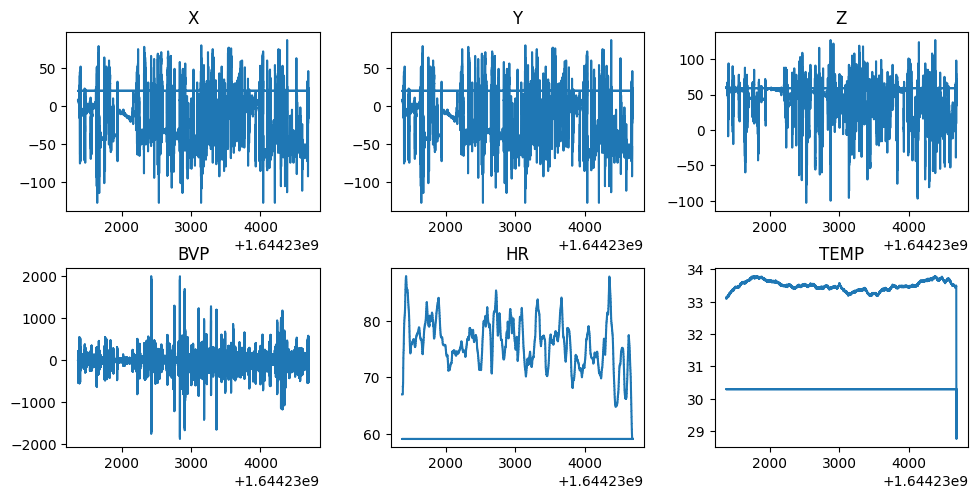

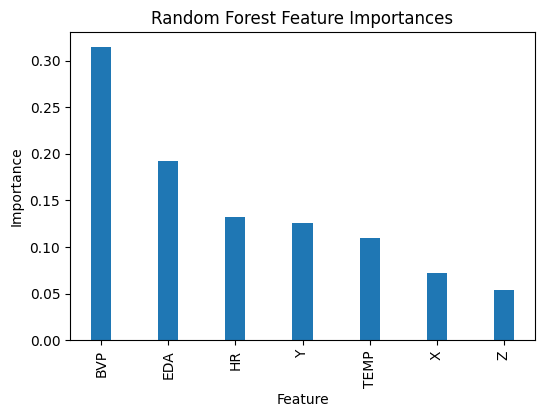


Accuracy Scores:  [0.3994491  0.31879929 0.49751619 0.51070041 0.50342554]
Mean Accuracy:  0.4459781073615036
Mean squared error: 0.22139561163951407
F1 score: 0.8012679628064244
Precision: 0.7899166666666667
Accuracy: 0.778604388360486
Confusion matrix:
[[14114  5042]
 [ 4362 18958]]



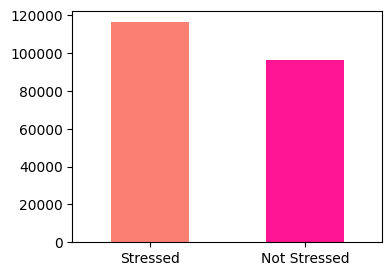

In [ ]:
analyse_data(df_3,'S3',3)


X       -0.000963
Y        0.264011
Z        0.144024
BVP      0.000152
EDA     -0.113982
HR      -0.319875
TEMP     0.022185
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
5      HR    0.192798
1       Y    0.190855
6    TEMP    0.151005
3     BVP    0.145108
2       Z    0.124863
4     EDA    0.118539
0       X    0.076833


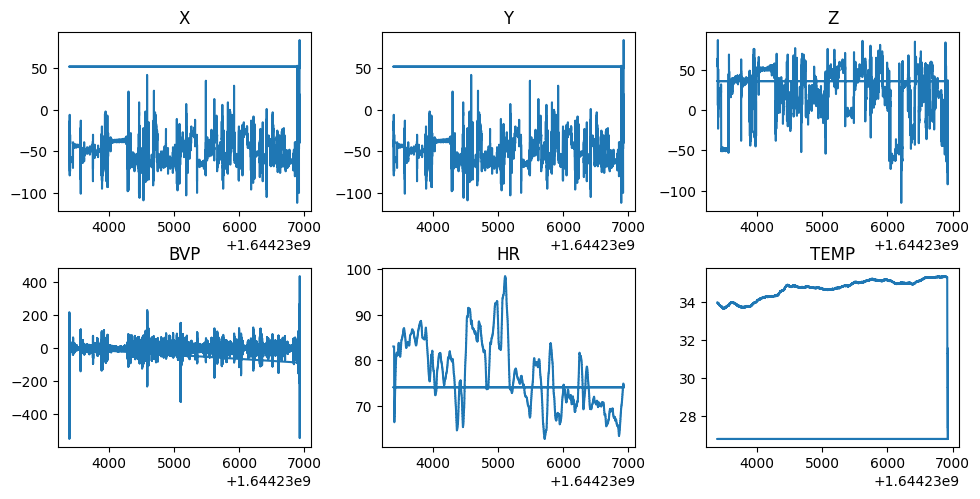

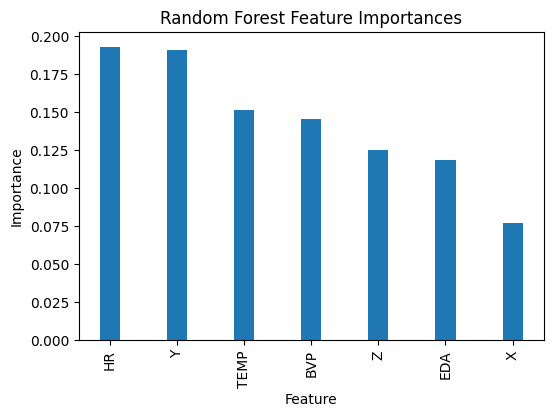


Accuracy Scores:  [0.63945969 0.42125941 0.53976207 0.50466815 0.50906041]
Mean Accuracy:  0.5228419449533185
Mean squared error: 0.23369457258260312
F1 score: 0.771505028270534
Precision: 0.7631387952012979
Accuracy: 0.7663054274173968
Confusion matrix:
[[16844  5548]
 [ 5040 17875]]



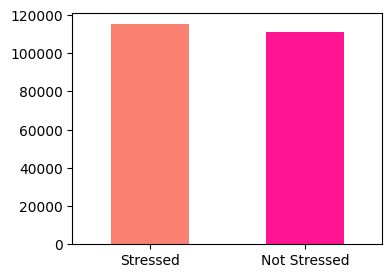

In [ ]:
analyse_data(df_4,'S4',4)

In [ ]:
print(data)


X       -0.070939
Y       -0.028058
Z       -0.084085
BVP      0.000458
EDA      0.078904
HR      -0.136944
TEMP     0.096322
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
6    TEMP    0.278973
3     BVP    0.278741
5      HR    0.101313
4     EDA    0.096485
0       X    0.094446
1       Y    0.093691
2       Z    0.056352


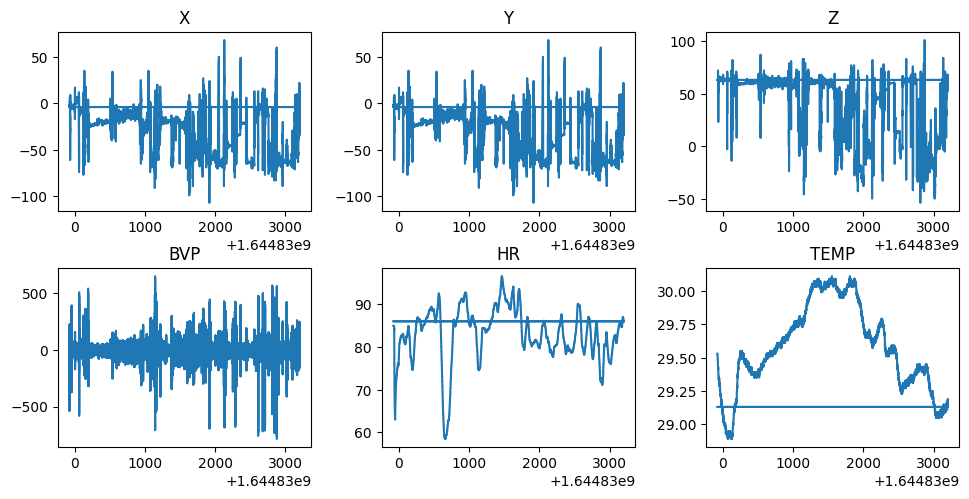

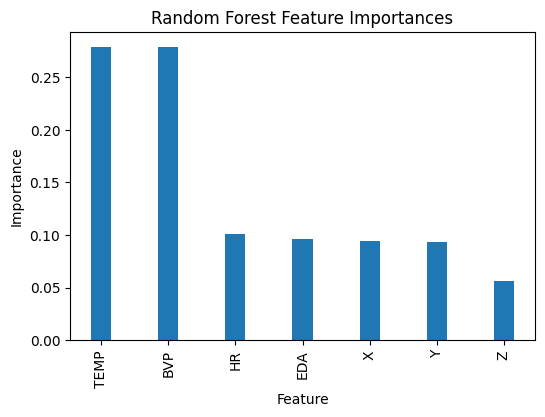


Accuracy Scores:  [0.7637525  0.7672085  0.63565725 0.56591586 0.55845549]
Mean Accuracy:  0.6581979217685292
Mean squared error: 0.1928448851177424
F1 score: 0.7135016465422613
Precision: 0.7814317846893664
Accuracy: 0.8071551148822576
Confusion matrix:
[[23790  2818]
 [ 5273 10075]]



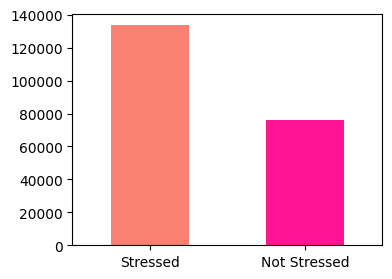

In [ ]:
analyse_data(df_5,'S5',5)


X       -0.283992
Y       -0.040468
Z       -0.041458
BVP     -0.000476
EDA     -0.013721
HR       0.079014
TEMP    -0.184958
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
6    TEMP    0.288200
3     BVP    0.184739
0       X    0.151320
4     EDA    0.116833
5      HR    0.098546
2       Z    0.082209
1       Y    0.078153


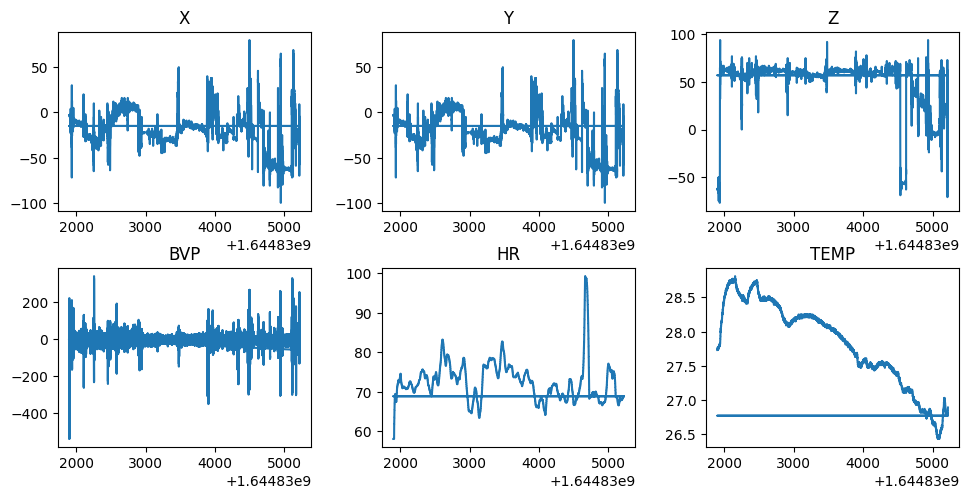

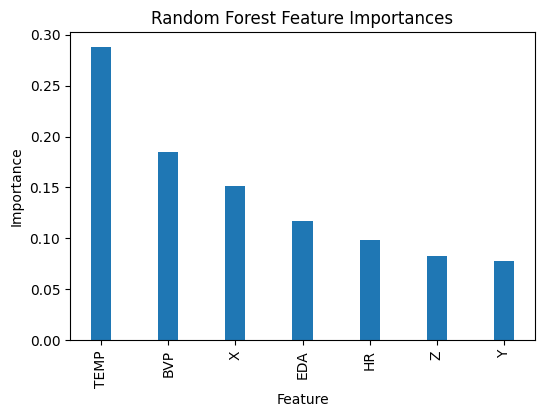


Accuracy Scores:  [0.52147817 0.6969754  0.5814895  0.50692025 0.48644195]
Mean Accuracy:  0.5586610561455049
Mean squared error: 0.23123455337177828
F1 score: 0.7807044957364168
Precision: 0.7598748533437623
Accuracy: 0.7687654466282218
Confusion matrix:
[[15174  5526]
 [ 4298 17487]]



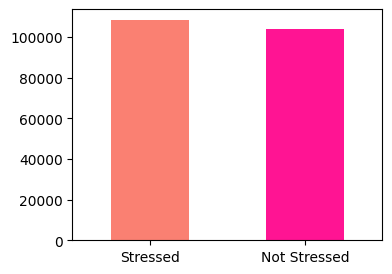

In [ ]:
analyse_data(df_6,'S6',6)


X        0.045695
Y       -0.037567
Z        0.038894
BVP     -0.000685
EDA     -0.025569
HR      -0.000194
TEMP     0.045382
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.267050
6    TEMP    0.246236
4     EDA    0.110046
2       Z    0.100312
1       Y    0.096640
0       X    0.091055
5      HR    0.088662


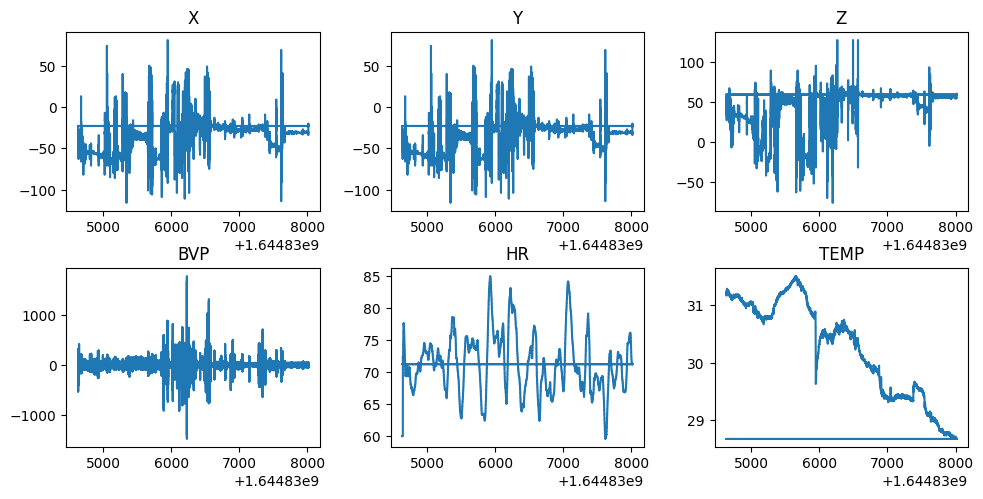

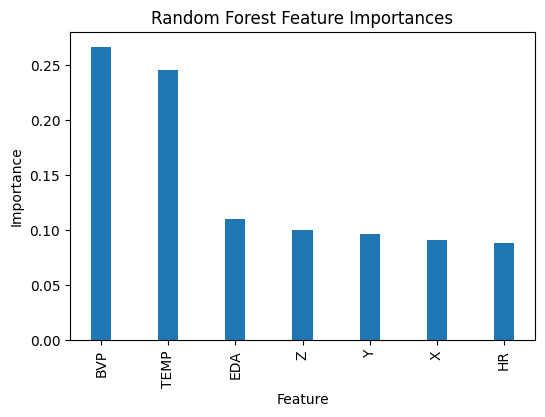


Accuracy Scores:  [0.44443674 0.61031757 0.59554847 0.56096152 0.5555761 ]
Mean Accuracy:  0.5533680790348866
Mean squared error: 0.20147459899228032
F1 score: 0.7000653752193511
Precision: 0.7548975957257347
Accuracy: 0.7985254010077197
Confusion matrix:
[[24376  3303]
 [ 5414 10173]]



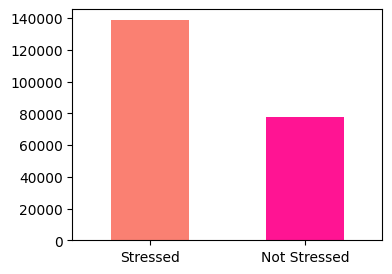

In [ ]:
analyse_data(df_7,'S7',7)


X        0.071454
Y       -0.207217
Z       -0.085537
BVP     -0.001649
EDA      0.039172
HR       0.016858
TEMP     0.130279
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
4     EDA    0.225568
3     BVP    0.220720
6    TEMP    0.138799
5      HR    0.138369
1       Y    0.128337
0       X    0.100438
2       Z    0.047769


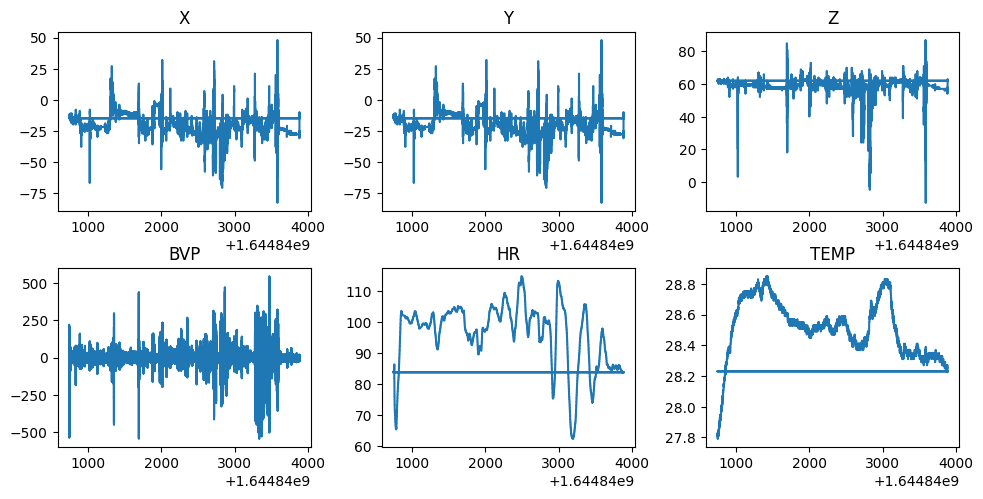

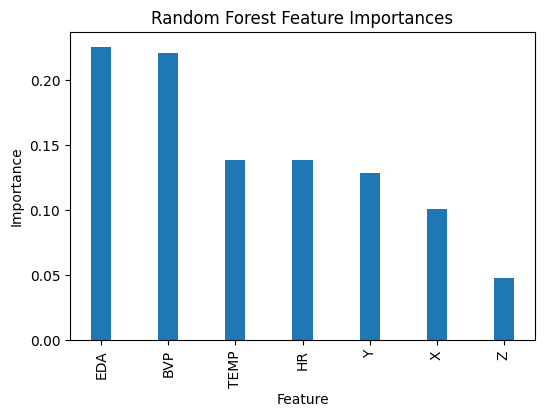


Accuracy Scores:  [0.35583325 0.4824228  0.61948771 0.55285583 0.55079377]
Mean Accuracy:  0.5122786721659063
Mean squared error: 0.20746795190301104
F1 score: 0.7009061280040112
Precision: 0.7853130016051364
Accuracy: 0.792532048096989
Confusion matrix:
[[22116  2675]
 [ 5676  9785]]



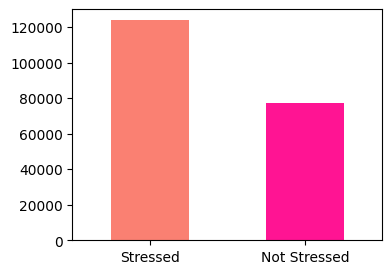

In [ ]:
analyse_data(df_8,'S8',8)


X       -0.030187
Y        0.210486
Z       -0.028855
BVP     -0.000141
EDA      0.065151
HR      -0.038986
TEMP    -0.019872
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.238453
6    TEMP    0.211928
1       Y    0.174458
0       X    0.121465
4     EDA    0.093702
2       Z    0.087998
5      HR    0.071997


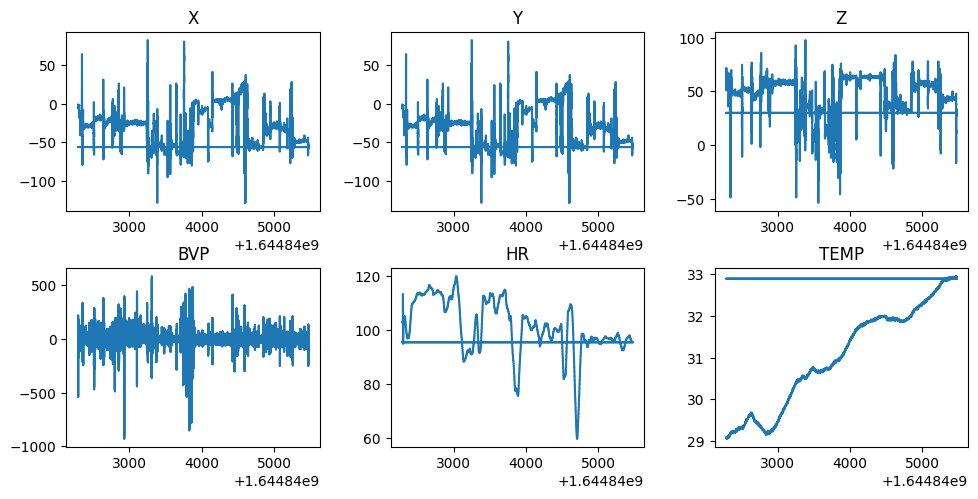

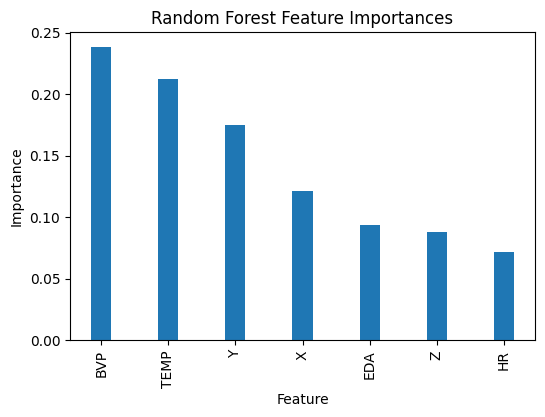


Accuracy Scores:  [0.29986268 0.48531215 0.58279591 0.5400309  0.53343469]
Mean Accuracy:  0.4882872652714155
Mean squared error: 0.2100191260850375
F1 score: 0.7287754520409133
Precision: 0.7598388800845219
Accuracy: 0.7899808739149625
Confusion matrix:
[[20710  3637]
 [ 4928 11507]]



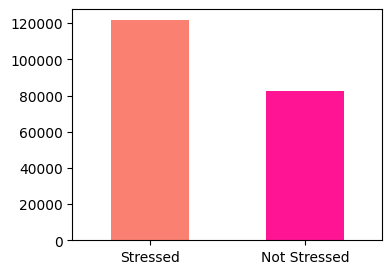

In [ ]:
analyse_data(df_9,'S9',9)


X        0.011007
Y        0.157605
Z       -0.019520
BVP     -0.000121
EDA      0.067521
HR      -0.021778
TEMP     0.058834
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
4     EDA    0.262660
3     BVP    0.243156
6    TEMP    0.146059
1       Y    0.102364
2       Z    0.086981
5      HR    0.082140
0       X    0.076639


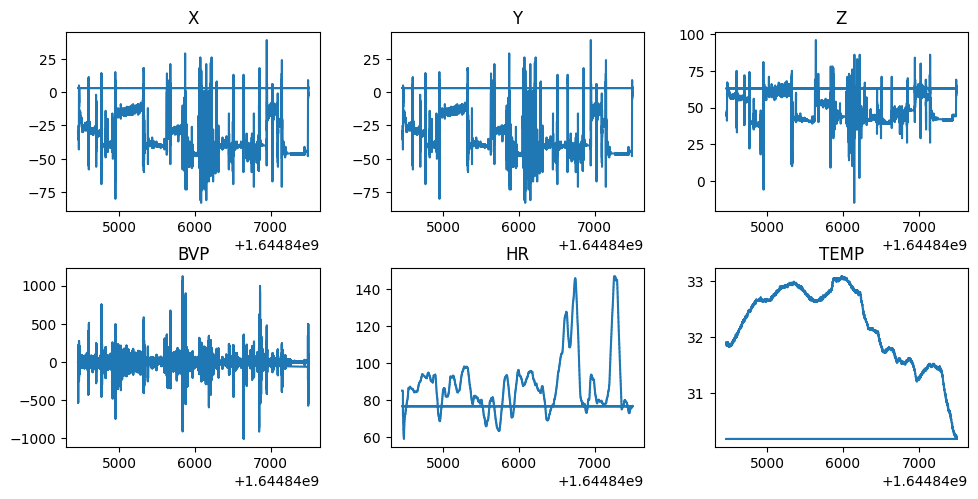

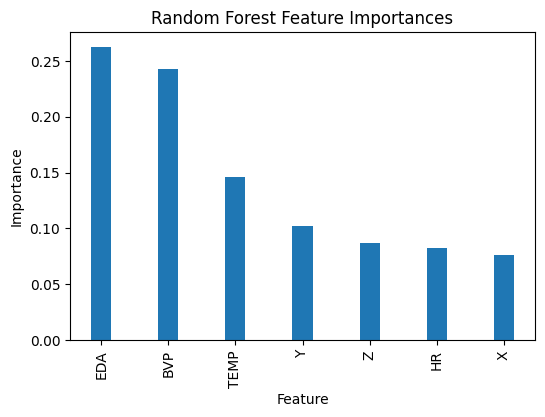


Accuracy Scores:  [0.40070466 0.45429997 0.69995371 0.46916469 0.45001672]
Mean Accuracy:  0.49482794988538636
Mean squared error: 0.21147515687686452
F1 score: 0.7212258873783776
Precision: 0.7717478052673583
Accuracy: 0.7885248431231355
Confusion matrix:
[[20024  3146]
 [ 5077 10637]]



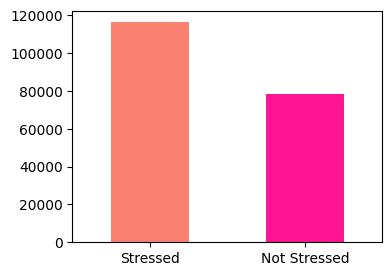

In [ ]:
analyse_data(df_10,'S10',10)


X        0.084715
Y        0.034879
Z        0.069907
BVP     -0.000545
EDA      0.155807
HR       0.087339
TEMP     0.036437
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
4     EDA    0.191774
3     BVP    0.189589
6    TEMP    0.160968
0       X    0.125621
5      HR    0.124769
1       Y    0.119855
2       Z    0.087425


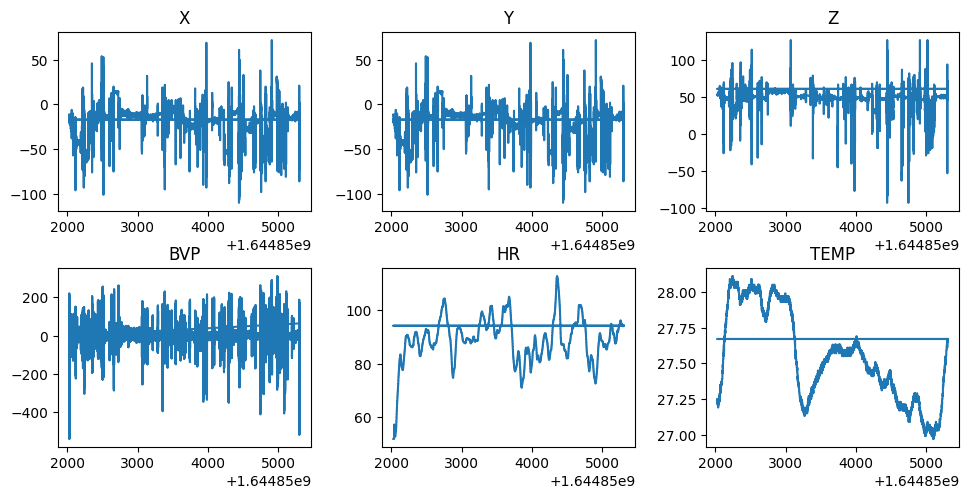

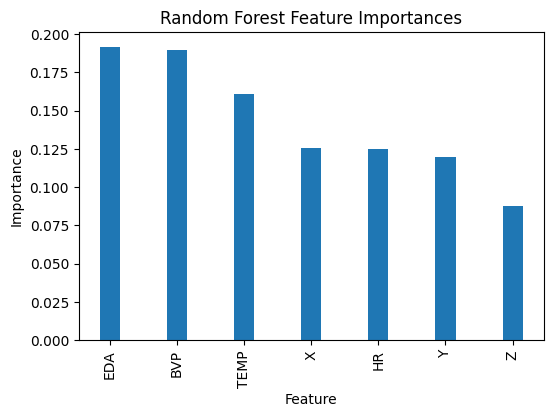


Accuracy Scores:  [0.58290044 0.46656817 0.45963399 0.53591002 0.55038723]
Mean Accuracy:  0.5190799713445525
Mean squared error: 0.2070723919363294
F1 score: 0.718533393794131
Precision: 0.7782767330900926
Accuracy: 0.7929276080636706
Confusion matrix:
[[22184  3160]
 [ 5530 11092]]



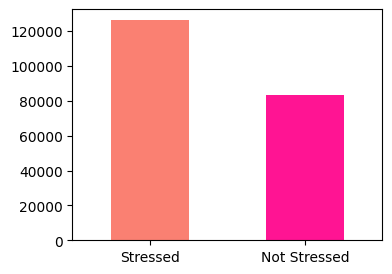

In [ ]:
analyse_data(df_11,'S11',11)


X       -0.056116
Y       -0.245853
Z        0.003870
BVP      0.000011
EDA      0.117948
HR       0.008796
TEMP     0.132480
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
1       Y    0.234763
6    TEMP    0.203948
3     BVP    0.174627
4     EDA    0.126564
0       X    0.116557
2       Z    0.089743
5      HR    0.053798


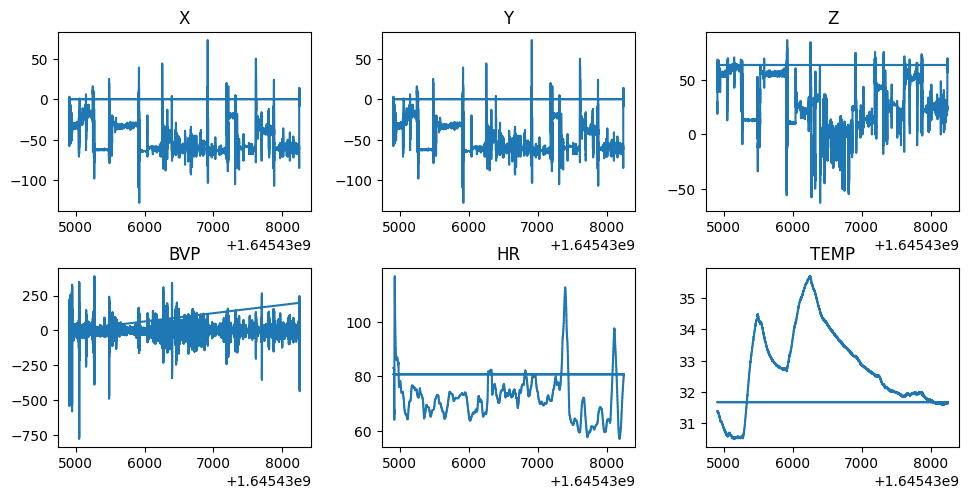

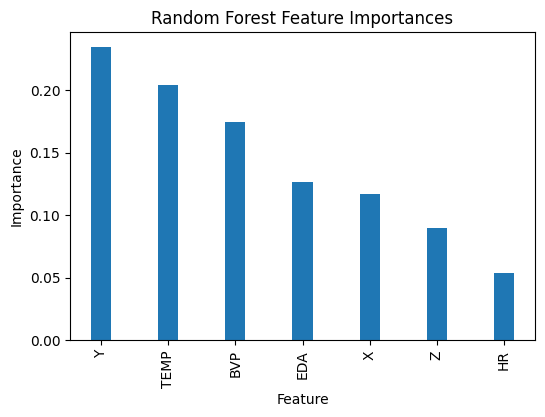


Accuracy Scores:  [0.59814395 0.64237126 0.66618355 0.57384637 0.55902567]
Mean Accuracy:  0.6079141590761323
Mean squared error: 0.1978540872858178
F1 score: 0.7003257328990228
Precision: 0.8038689750467366
Accuracy: 0.8021459127141822
Confusion matrix:
[[24425  2413]
 [ 6051  9890]]



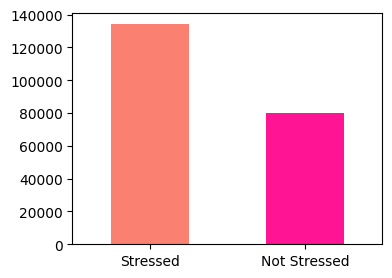

In [ ]:
#@title Default title text
analyse_data(df_12,'S12',12)


X       -0.078024
Y       -0.195868
Z       -0.182436
BVP     -0.000103
EDA      0.065414
HR       0.047517
TEMP     0.074261
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.337059
1       Y    0.168155
6    TEMP    0.137756
4     EDA    0.101980
2       Z    0.094026
0       X    0.081689
5      HR    0.079336


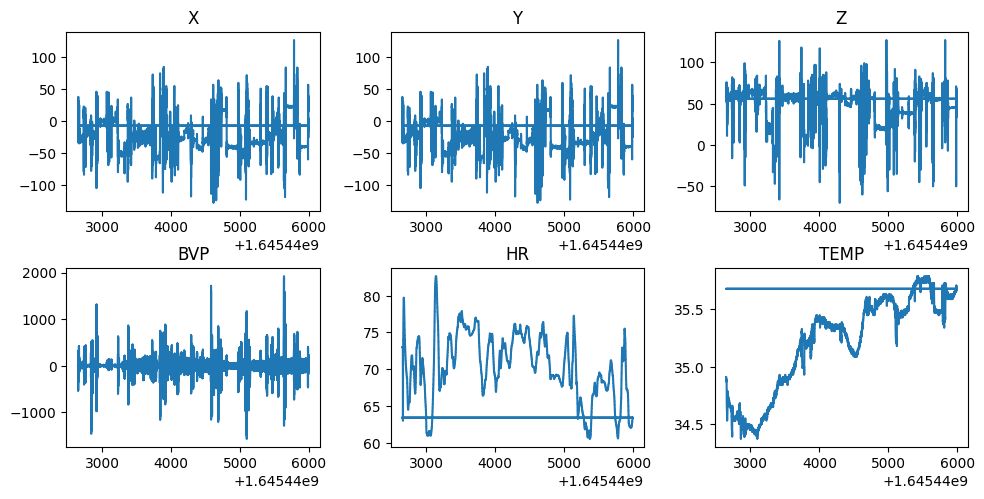

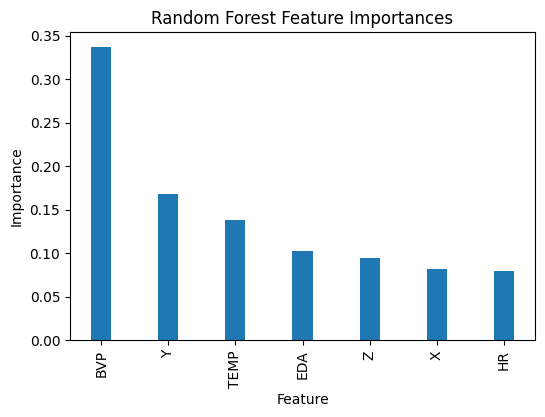


Accuracy Scores:  [0.3465113  0.43071642 0.61182075 0.54195175 0.50526586]
Mean Accuracy:  0.4872532180009679
Mean squared error: 0.20845787408929572
F1 score: 0.7391062921939386
Precision: 0.7615176151761518
Accuracy: 0.7915421259107043
Confusion matrix:
[[21252  3960]
 [ 4967 12645]]



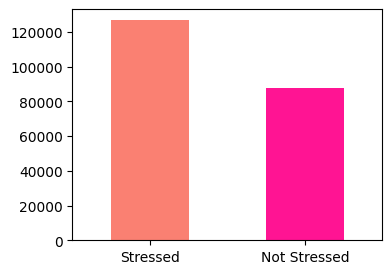

In [ ]:
analyse_data(df_13,'S13',13)


X       -0.059102
Y        0.117103
Z       -0.009956
BVP     -0.000171
EDA      0.067903
HR       0.090215
TEMP     0.220207
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.252175
6    TEMP    0.195935
4     EDA    0.137300
5      HR    0.126647
1       Y    0.124363
0       X    0.081967
2       Z    0.081613


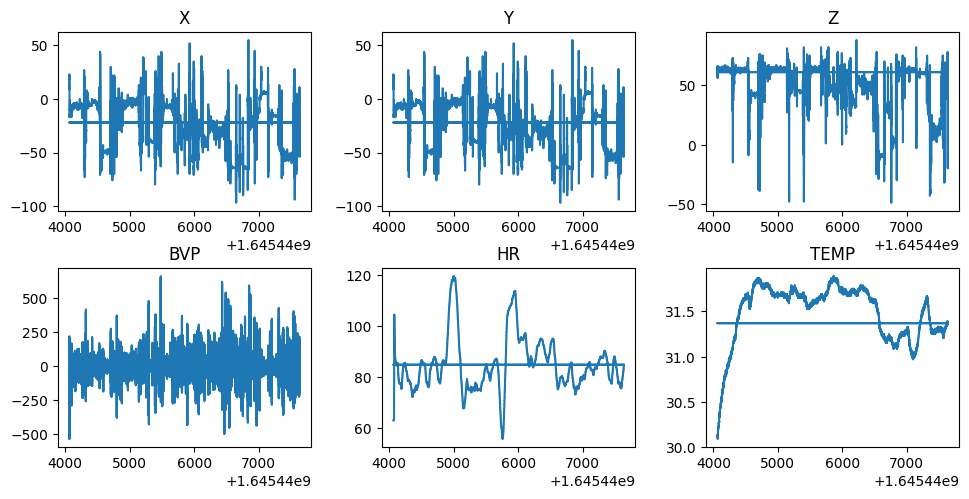

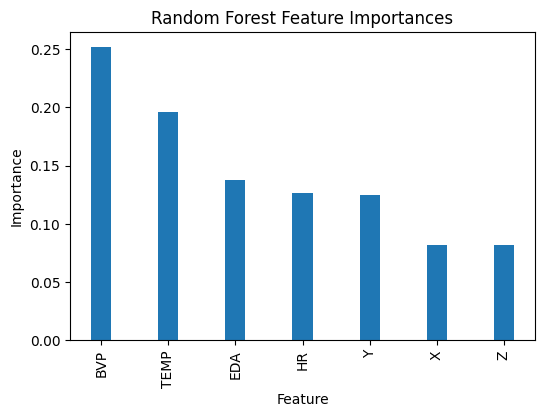


Accuracy Scores:  [0.63415487 0.5650236  0.62693644 0.56829156 0.57270522]
Mean Accuracy:  0.5934223384601773
Mean squared error: 0.19491784653032687
F1 score: 0.6988285338104723
Precision: 0.7673487544483986
Accuracy: 0.8050821534696732
Confusion matrix:
[[26497  3138]
 [ 5783 10350]]



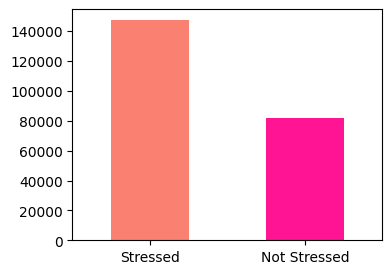

In [ ]:
analyse_data(df_14,'S14',14)


X        0.115279
Y       -0.049881
Z        0.176198
BVP     -0.000745
EDA      0.019834
HR       0.089083
TEMP    -0.109138
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.276653
1       Y    0.179798
4     EDA    0.145463
2       Z    0.112632
6    TEMP    0.106860
0       X    0.105490
5      HR    0.073103


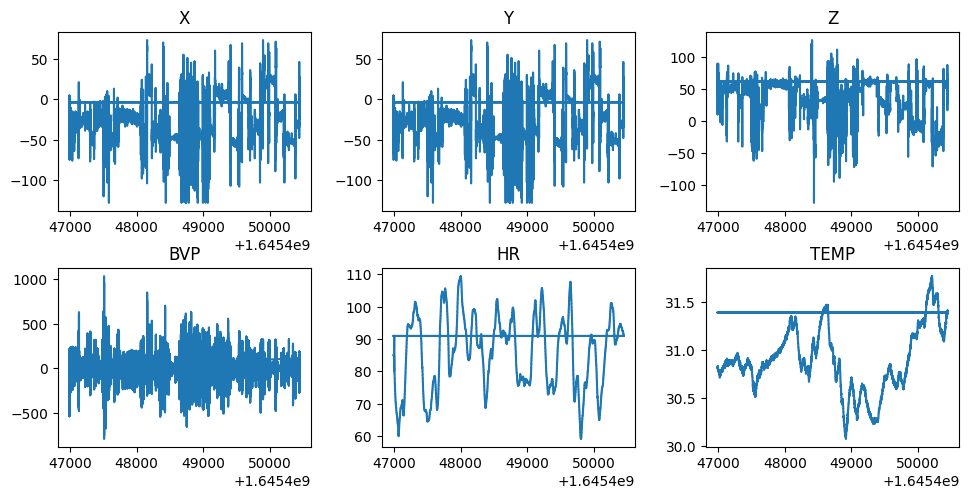

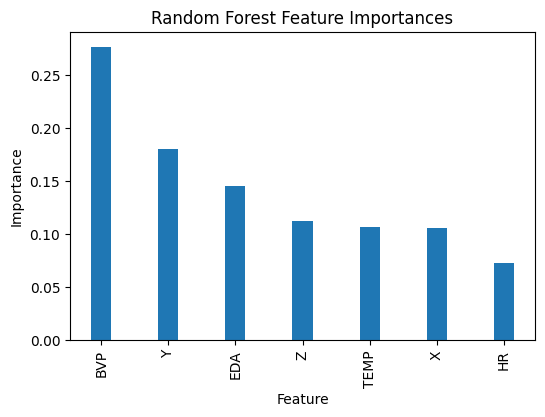


Accuracy Scores:  [0.23748645 0.62743947 0.63935759 0.55438097 0.56249012]
Mean Accuracy:  0.5242309189947706
Mean squared error: 0.19307914709071197
F1 score: 0.7064157164445666
Precision: 0.7831251903746573
Accuracy: 0.8069208529092881
Confusion matrix:
[[25440  2848]
 [ 5700 10284]]



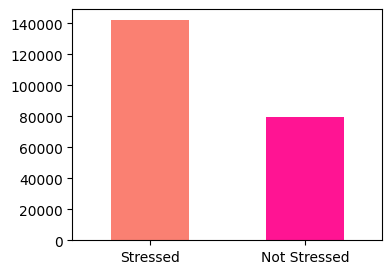

In [ ]:
analyse_data(df_15,'S15',15)


X       -0.038430
Y        0.077554
Z       -0.096378
BVP     -0.000281
EDA     -0.060195
HR      -0.020841
TEMP     0.020961
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.314603
6    TEMP    0.170203
4     EDA    0.139097
5      HR    0.124223
1       Y    0.096159
2       Z    0.080379
0       X    0.075337


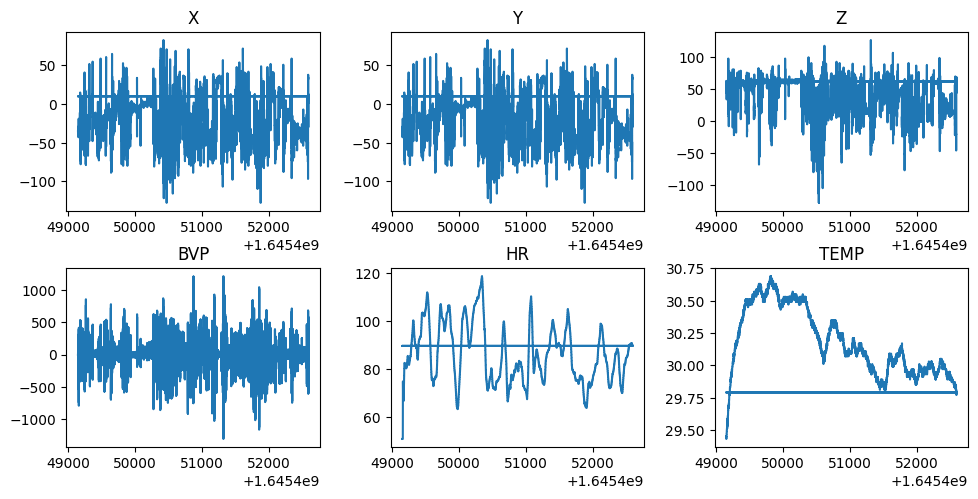

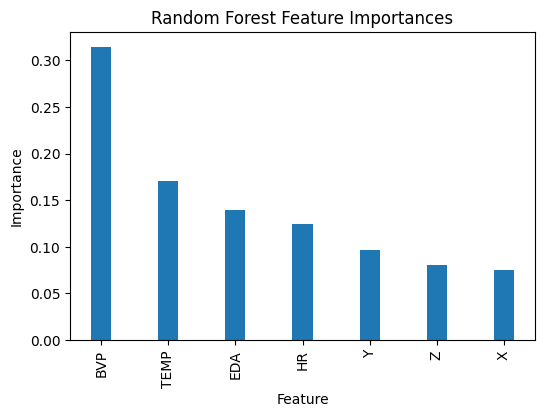


Accuracy Scores:  [0.65282343 0.53502448 0.39760156 0.55170929 0.54846754]
Mean Accuracy:  0.5371252592336293
Mean squared error: 0.20071180831047536
F1 score: 0.7285214938370025
Precision: 0.7906295754026355
Accuracy: 0.7992881916895246
Confusion matrix:
[[23379  3146]
 [ 5708 11880]]



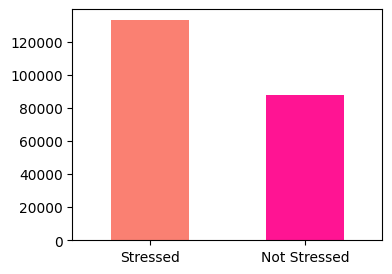

In [ ]:
analyse_data(df_16,'S16',16)


X       NaN
Y       NaN
Z       NaN
BVP     NaN
EDA     NaN
HR      NaN
TEMP    NaN
Label   NaN
Name: Label, dtype: float64

feature importances
  Feature  Importance
0       X         0.0
1       Y         0.0
2       Z         0.0
3     BVP         0.0
4     EDA         0.0
5      HR         0.0
6    TEMP         0.0


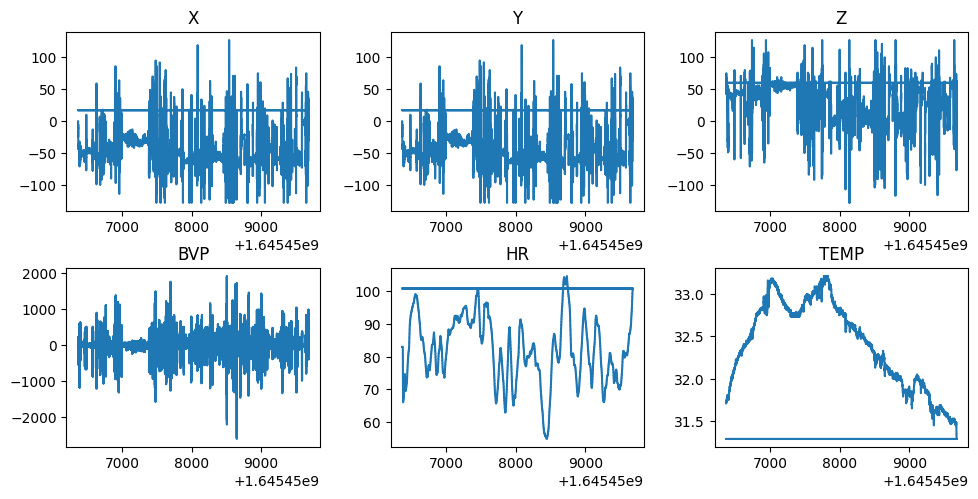

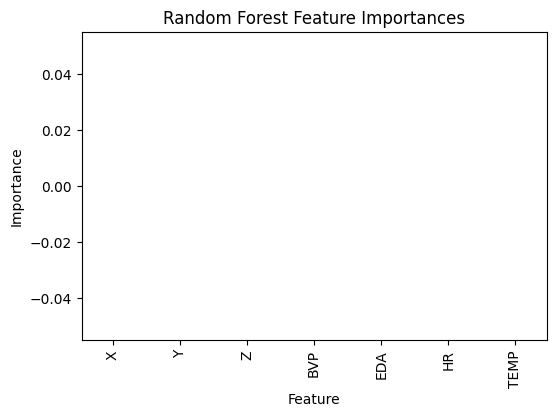


Accuracy Scores:  [1. 1. 1. 1. 1.]
Mean Accuracy:  1.0
Mean squared error: 0.0
F1 score: 0.0
Precision: 0.0
Accuracy: 1.0
Confusion matrix:
[[42384]]



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


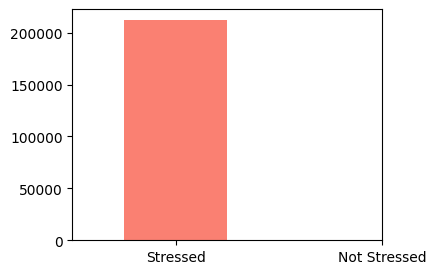

In [ ]:
analyse_data(df_17,'S17',17)


X       -0.024010
Y       -0.008166
Z       -0.003165
BVP      0.000213
EDA      0.002865
HR      -0.011254
TEMP    -0.297988
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
6    TEMP    0.291022
3     BVP    0.275913
5      HR    0.098752
1       Y    0.095066
0       X    0.082498
2       Z    0.078752
4     EDA    0.077998


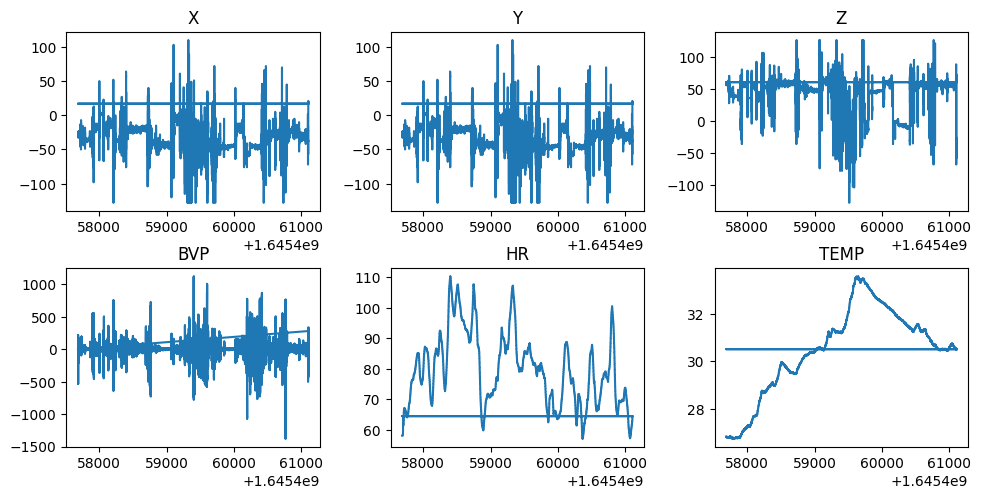

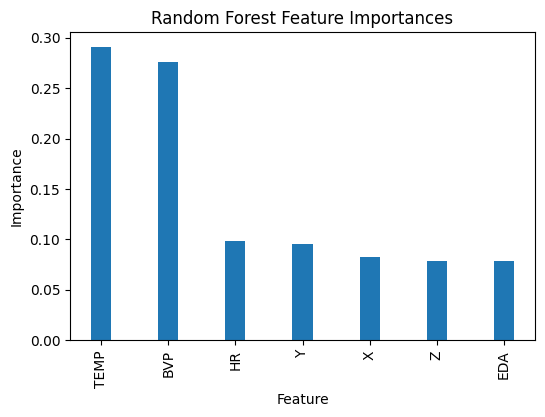


Accuracy Scores:  [0.61578491 0.57098188 0.52553978 0.54603551 0.54944879]
Mean Accuracy:  0.5615581752352843
Mean squared error: 0.19450403980462866
F1 score: 0.8416750269386541
Precision: 0.7986742824906565
Accuracy: 0.8054959601953714
Confusion matrix:
[[12640  5710]
 [ 2812 22652]]



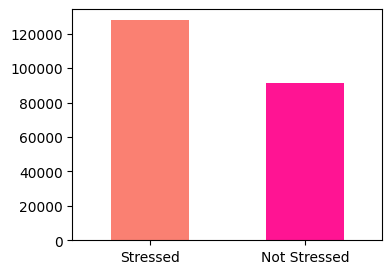

In [ ]:
analyse_data(df_18,'S18',18)


X       -0.057561
Y       -0.113922
Z       -0.065898
BVP      0.000442
EDA     -0.021630
HR      -0.127279
TEMP     0.067524
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.300668
4     EDA    0.227568
6    TEMP    0.132062
0       X    0.107086
2       Z    0.087949
5      HR    0.079475
1       Y    0.065192


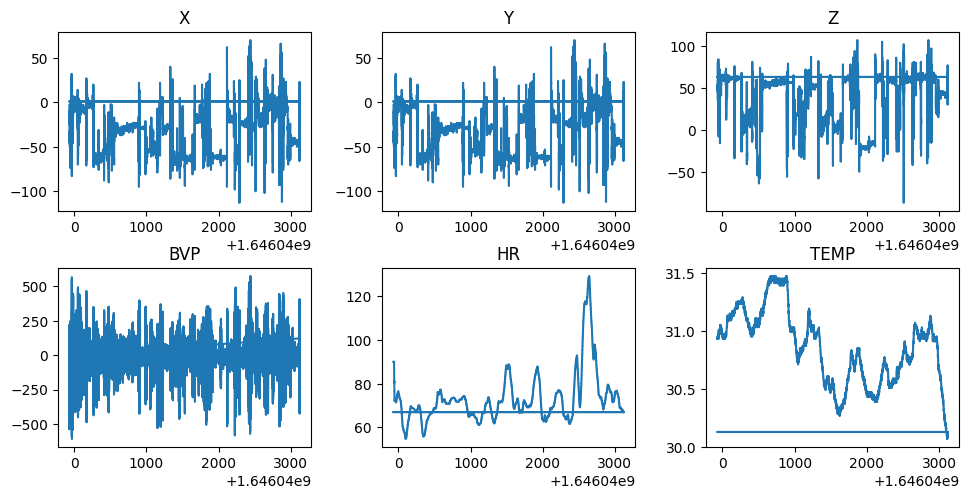

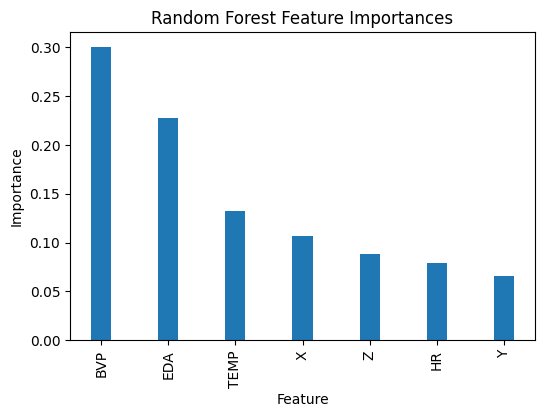


Accuracy Scores:  [0.4870716  0.71894418 0.60900729 0.51335682 0.51460443]
Mean Accuracy:  0.5685968634884213
Mean squared error: 0.22307297145233493
F1 score: 0.741912659553392
Precision: 0.7576300578034683
Accuracy: 0.776927028547665
Confusion matrix:
[[18653  4193]
 [ 4926 13107]]



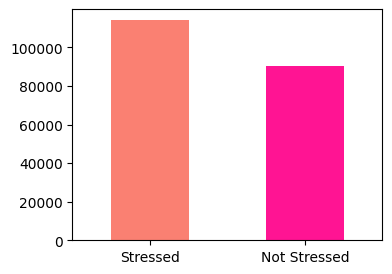

In [ ]:
analyse_data(df_19,'S19',19)


X        0.009566
Y       -0.056901
Z       -0.097271
BVP     -0.000132
EDA      0.013767
HR       0.070619
TEMP    -0.068068
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.297704
6    TEMP    0.171758
4     EDA    0.163793
5      HR    0.115606
2       Z    0.106595
1       Y    0.081027
0       X    0.063517


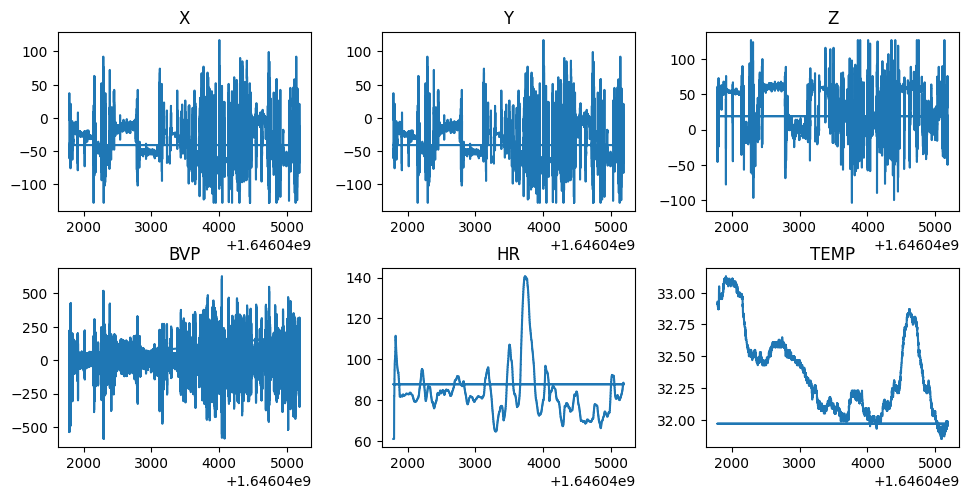

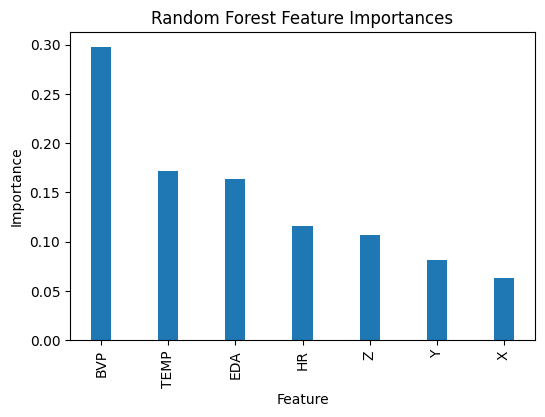


Accuracy Scores:  [0.55395303 0.70593242 0.61716468 0.53775907 0.54677616]
Mean Accuracy:  0.5923170703655142
Mean squared error: 0.2051158190141007
F1 score: 0.724298920941162
Precision: 0.7604362786470168
Accuracy: 0.7948841809858993
Confusion matrix:
[[22843  3690]
 [ 5227 11713]]



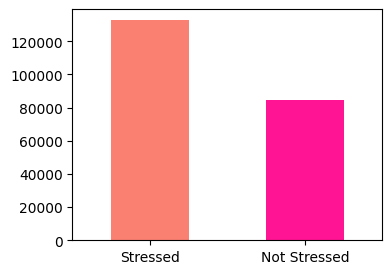

In [ ]:
analyse_data(df_20,'S20',20)


X        0.025033
Y       -0.059818
Z       -0.019104
BVP      0.000143
EDA     -0.081970
HR       0.134592
TEMP     0.030060
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.233033
1       Y    0.182631
4     EDA    0.175777
6    TEMP    0.136565
5      HR    0.105655
0       X    0.084900
2       Z    0.081439


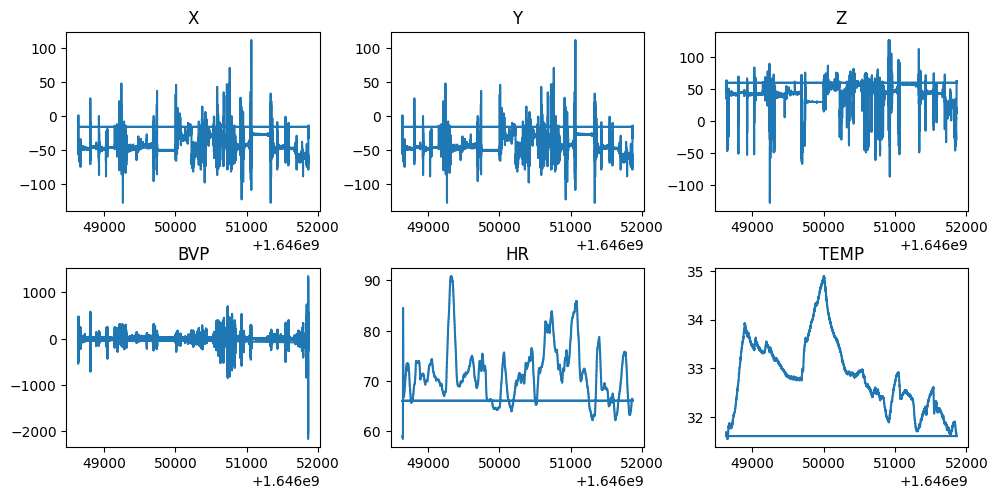

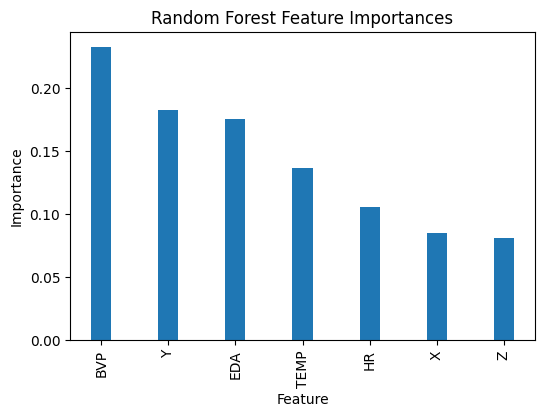


Accuracy Scores:  [0.47006416 0.46955574 0.63251422 0.51372748 0.52634127]
Mean Accuracy:  0.522440576534359
Mean squared error: 0.21285558649073963
F1 score: 0.7144712912444791
Precision: 0.7845374794950432
Accuracy: 0.7871444135092603
Confusion matrix:
[[21513  3021]
 [ 5771 11000]]



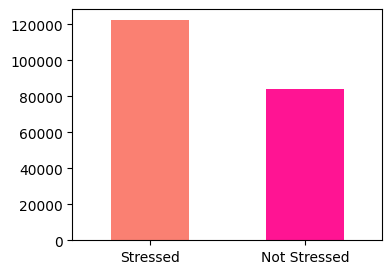

In [ ]:
analyse_data(df_21,'S21',21)


X       -0.103891
Y        0.103641
Z       -0.065963
BVP     -0.000423
EDA     -0.090466
HR       0.012848
TEMP     0.040882
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.314012
6    TEMP    0.142215
1       Y    0.128087
2       Z    0.108072
5      HR    0.107058
4     EDA    0.103652
0       X    0.096905


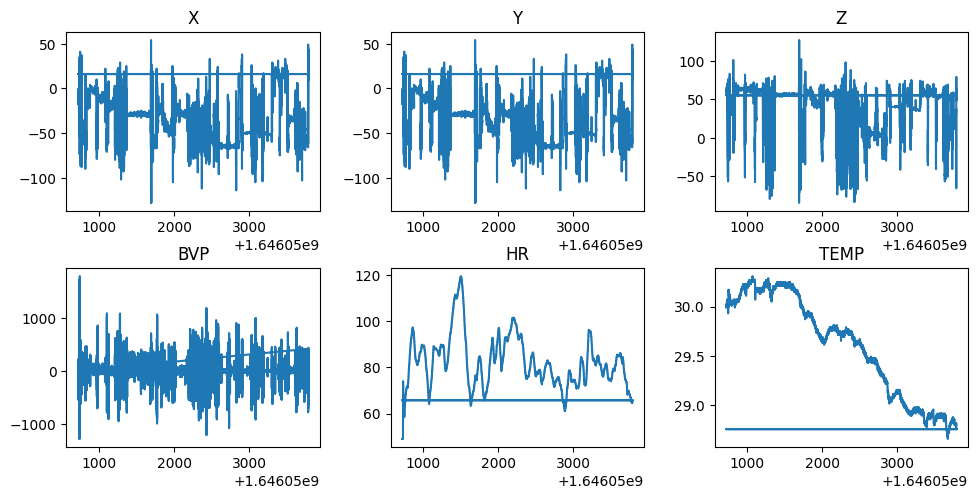

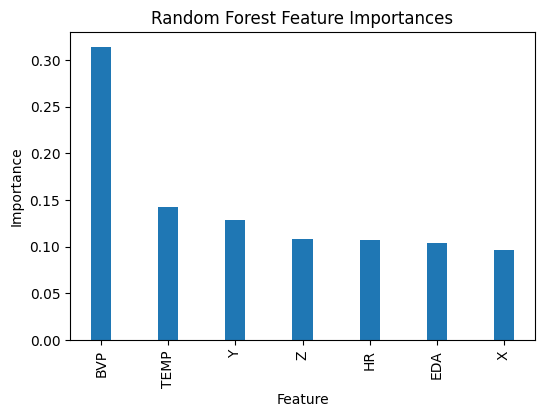


Accuracy Scores:  [0.34910232 0.6478374  0.55446176 0.5162837  0.51011196]
Mean Accuracy:  0.5155594249587496
Mean squared error: 0.2135570743649903
F1 score: 0.7362519685039369
Precision: 0.7637718094491276
Accuracy: 0.7864429256350097
Confusion matrix:
[[19150  3615]
 [ 4759 11688]]



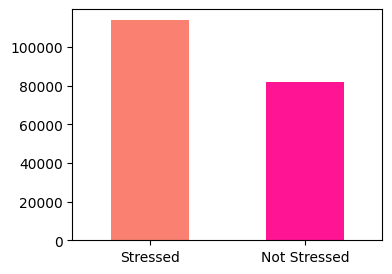

In [ ]:
analyse_data(df_22,'S22',22)


X        0.074705
Y        0.026644
Z        0.173667
BVP      0.000236
EDA      0.001214
HR      -0.026935
TEMP     0.075480
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
4     EDA    0.212800
3     BVP    0.171881
6    TEMP    0.157241
1       Y    0.145181
2       Z    0.125779
0       X    0.104991
5      HR    0.082126


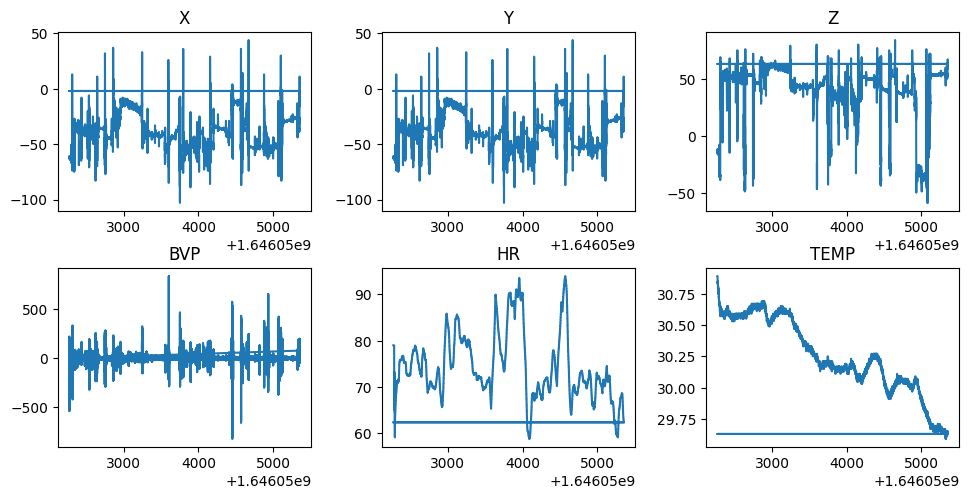

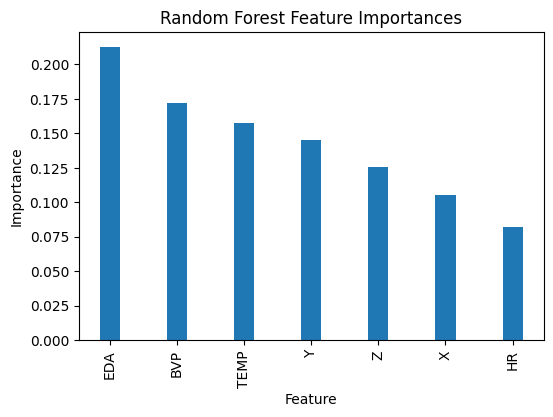


Accuracy Scores:  [0.31103467 0.65173626 0.40500278 0.51785624 0.52478628]
Mean Accuracy:  0.4820832476557488
Mean squared error: 0.2249171703887301
F1 score: 0.7247686546377393
Precision: 0.7734328555386749
Accuracy: 0.7750828296112698
Confusion matrix:
[[18937  3430]
 [ 5463 11709]]



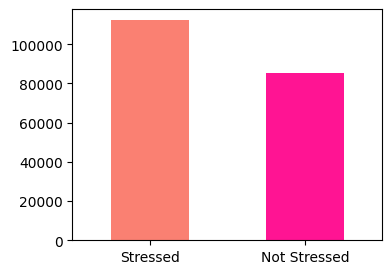

In [ ]:
analyse_data(df_23,'S23',23)


X        0.124249
Y        0.051501
Z        0.135083
BVP     -0.000211
EDA      0.049151
HR      -0.083526
TEMP    -0.072066
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
4     EDA    0.239025
3     BVP    0.238613
1       Y    0.178778
6    TEMP    0.120416
2       Z    0.092337
0       X    0.090058
5      HR    0.040773


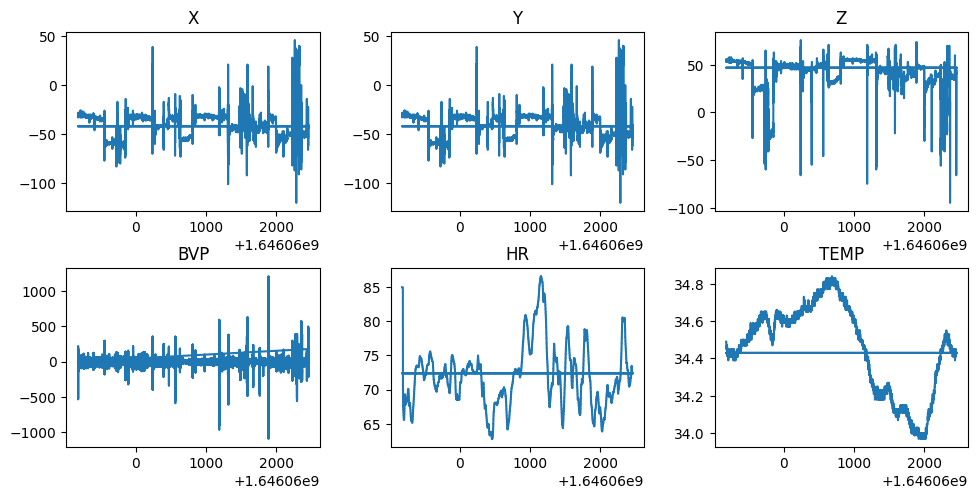

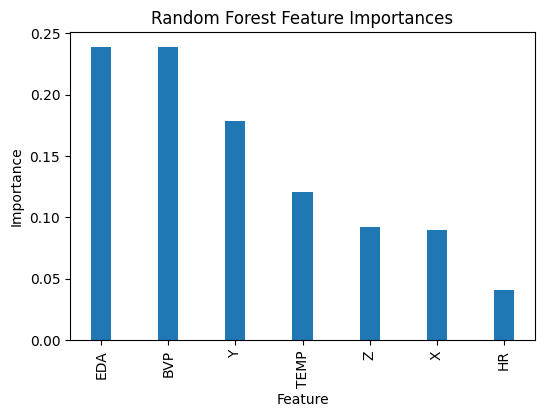


Accuracy Scores:  [0.43642735 0.58898265 0.62447559 0.52212052 0.52469489]
Mean Accuracy:  0.5393401983218917
Mean squared error: 0.2086670480549199
F1 score: 0.7108027750247771
Precision: 0.7714593044101828
Accuracy: 0.7913329519450801
Confusion matrix:
[[22440  3187]
 [ 5567 10758]]



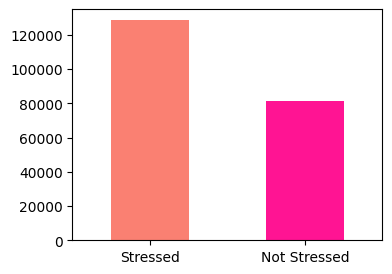

In [ ]:
analyse_data(df_24,'S24',24)


X        0.265408
Y        0.158210
Z        0.307191
BVP      0.000191
EDA      0.075125
HR      -0.282577
TEMP     0.040932
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.219879
0       X    0.182576
6    TEMP    0.168854
4     EDA    0.126203
5      HR    0.108696
1       Y    0.104388
2       Z    0.089405


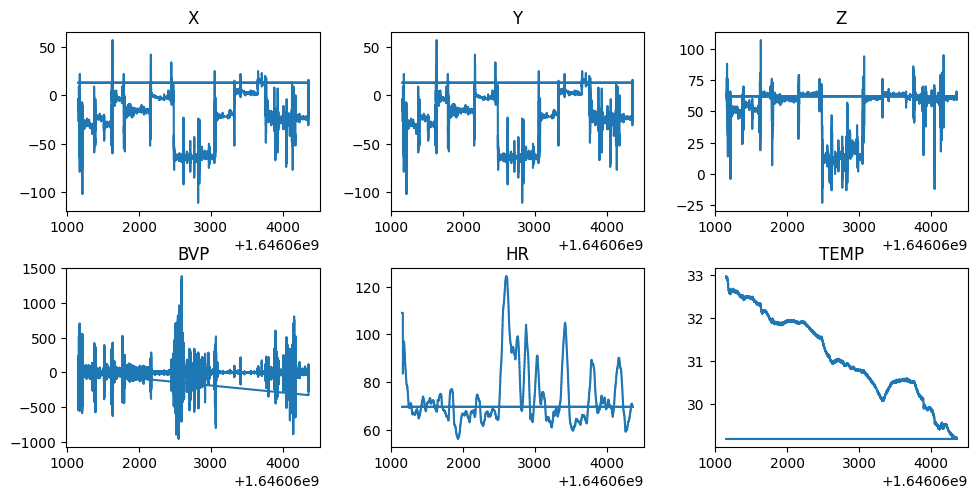

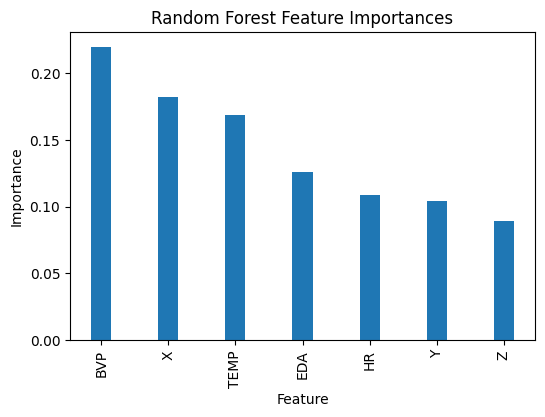


Accuracy Scores:  [0.81433122 0.81634936 0.75147713 0.55480718 0.54911735]
Mean Accuracy:  0.6972164462495423
Mean squared error: 0.196537554404649
F1 score: 0.7610347376201035
Precision: 0.7654475170978293
Accuracy: 0.803462445595351
Confusion matrix:
[[20173  3944]
 [ 4139 12871]]



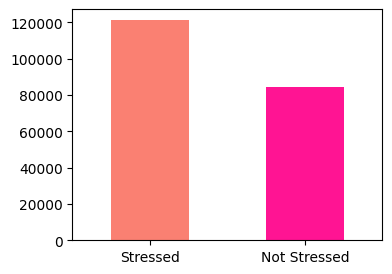

In [ ]:
analyse_data(df_25,'S25',25)


X        0.040272
Y       -0.012986
Z       -0.033464
BVP     -0.000452
EDA      0.250878
HR       0.049043
TEMP    -0.136633
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.287383
4     EDA    0.219087
6    TEMP    0.170132
5      HR    0.099911
2       Z    0.091296
1       Y    0.071628
0       X    0.060564


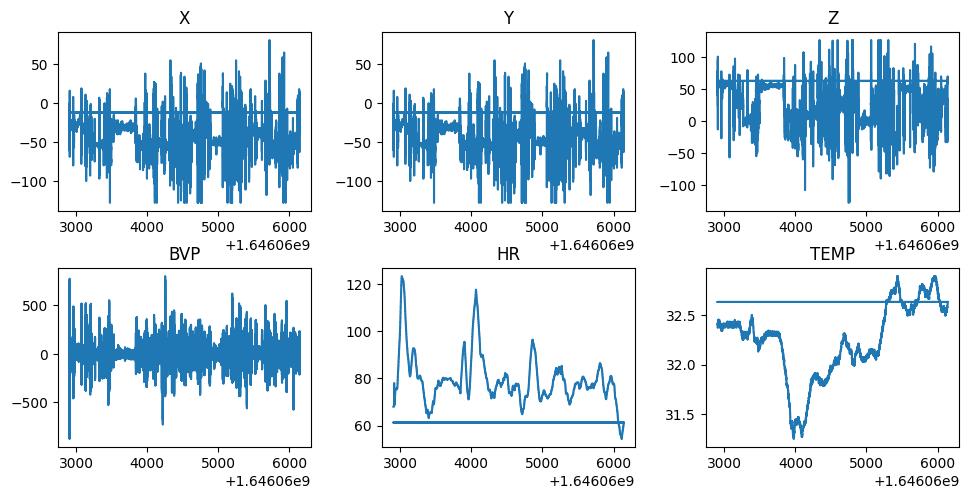

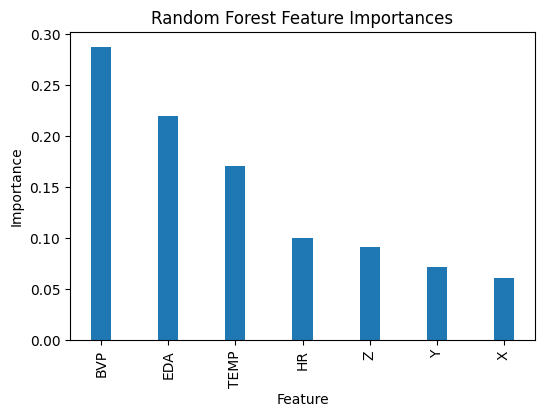


Accuracy Scores:  [0.34078414 0.59796002 0.57669215 0.54078754 0.53883437]
Mean Accuracy:  0.5190116429112221
Mean squared error: 0.20910493827160495
F1 score: 0.7144174405585194
Precision: 0.7538397386892766
Accuracy: 0.7908950617283951
Confusion matrix:
[[21953  3542]
 [ 5130 10847]]



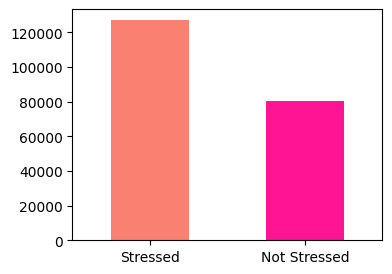

In [ ]:
analyse_data(df_26,'S26',26)


X       -0.043916
Y        0.066461
Z        0.078826
BVP     -0.000052
EDA     -0.079097
HR      -0.285722
TEMP     0.162823
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
6    TEMP    0.250042
3     BVP    0.240382
4     EDA    0.149588
5      HR    0.147875
0       X    0.079062
2       Z    0.066886
1       Y    0.066164


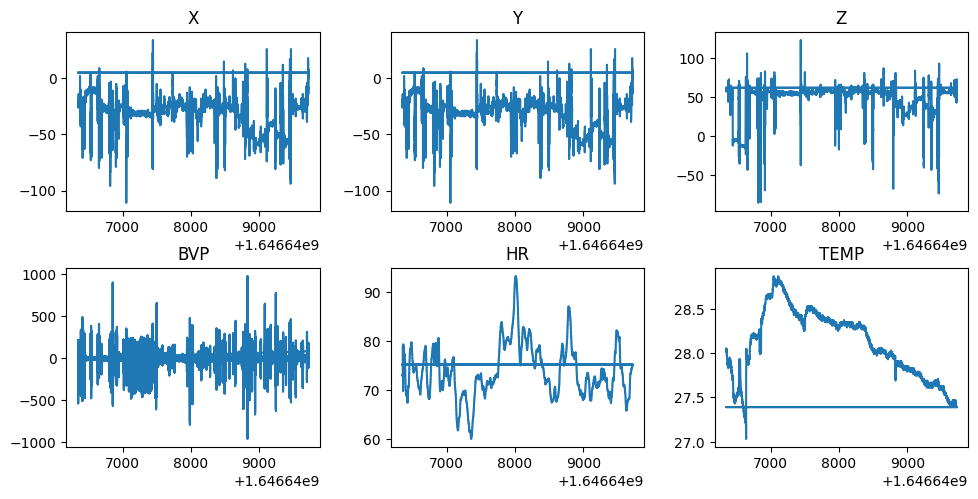

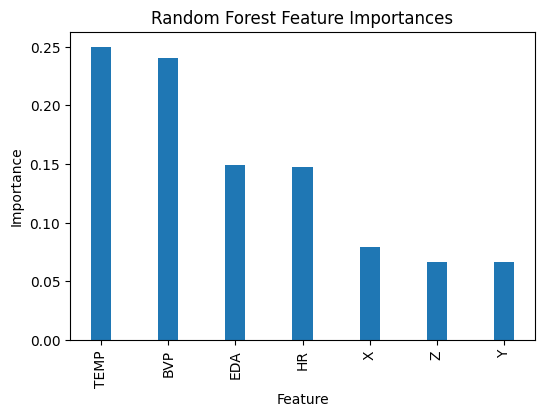


Accuracy Scores:  [0.76208092 0.50996532 0.62625725 0.55790885 0.55203589]
Mean Accuracy:  0.6016496471768467
Mean squared error: 0.19498265895953756
F1 score: 0.72982411174831
Precision: 0.821315258148255
Accuracy: 0.8050173410404624
Confusion matrix:
[[23427  2478]
 [ 5955 11390]]



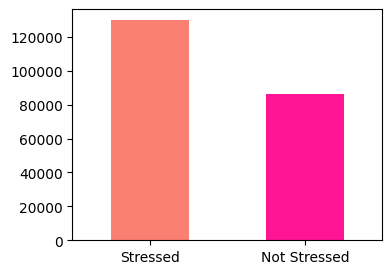

In [ ]:
analyse_data(df_27,'S27',27)


X        0.008826
Y        0.127715
Z        0.032592
BVP     -0.000201
EDA      0.022622
HR       0.039387
TEMP     0.026151
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.249675
6    TEMP    0.190952
4     EDA    0.185042
1       Y    0.127294
2       Z    0.098462
5      HR    0.083450
0       X    0.065126


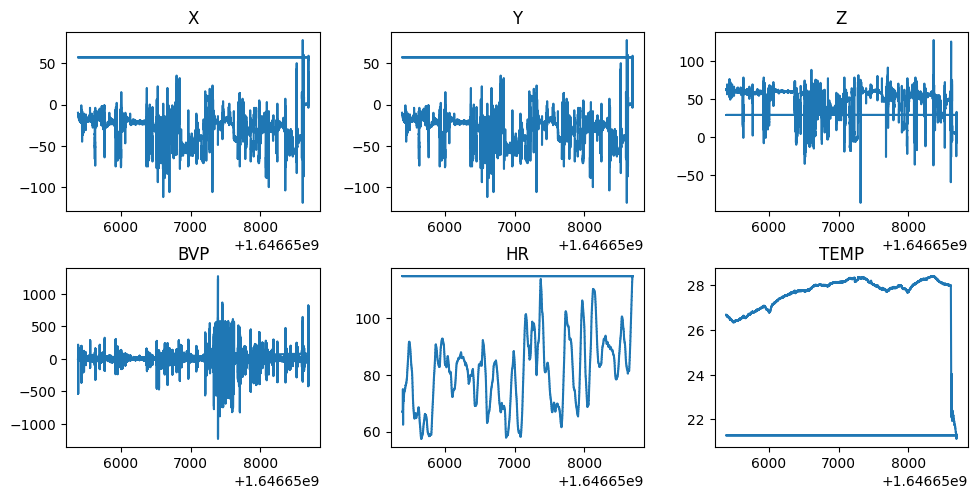

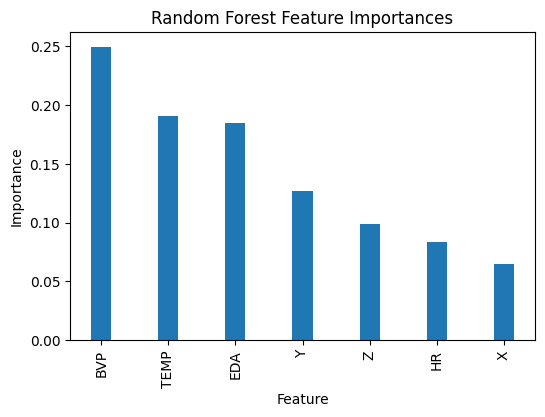


Accuracy Scores:  [0.59237384 0.62710263 0.61936825 0.58768635 0.61098117]
Mean Accuracy:  0.6075024477214569
Mean squared error: 0.18035343035343035
F1 score: 0.7207958452198083
Precision: 0.8544918487686438
Accuracy: 0.8196465696465697
Confusion matrix:
[[24840  1678]
 [ 5956  9854]]



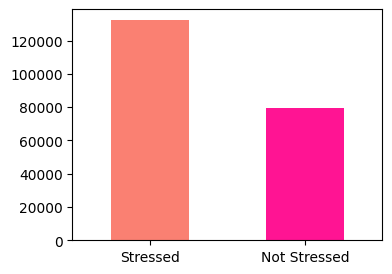

In [ ]:
analyse_data(df_28,'S28',28)

feature importances
  Feature  Importance
0     BVP    0.523832
1      HR    0.476168


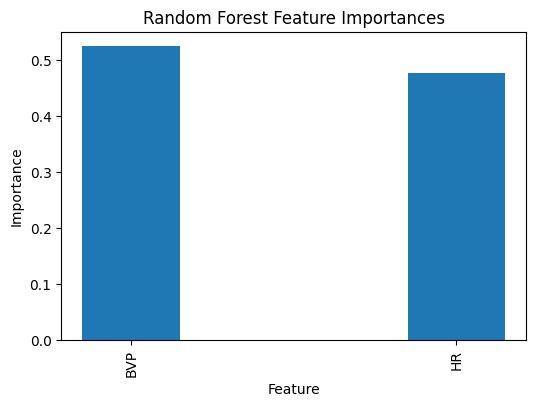


Accuracy Scores:  [0.52646003 0.56976469 0.56909301 0.5879226  0.61029603]
Mean Accuracy:  0.5727072732547962
Mean squared error: 0.24232186732186733
F1 score: 0.6210514648834374
Precision: 0.7511170688114388
Accuracy: 0.7576781326781327
Confusion matrix:
[[23666  2785]
 [ 7472  8405]]


In [28]:
train_randomforestmodel_withBVP(df_28, 'S28',28)


X        0.058233
Y       -0.019892
Z        0.167573
BVP     -0.000094
EDA      0.094666
HR       0.049427
TEMP     0.192014
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.186517
6    TEMP    0.182066
1       Y    0.165446
4     EDA    0.164842
5      HR    0.129679
2       Z    0.101837
0       X    0.069613


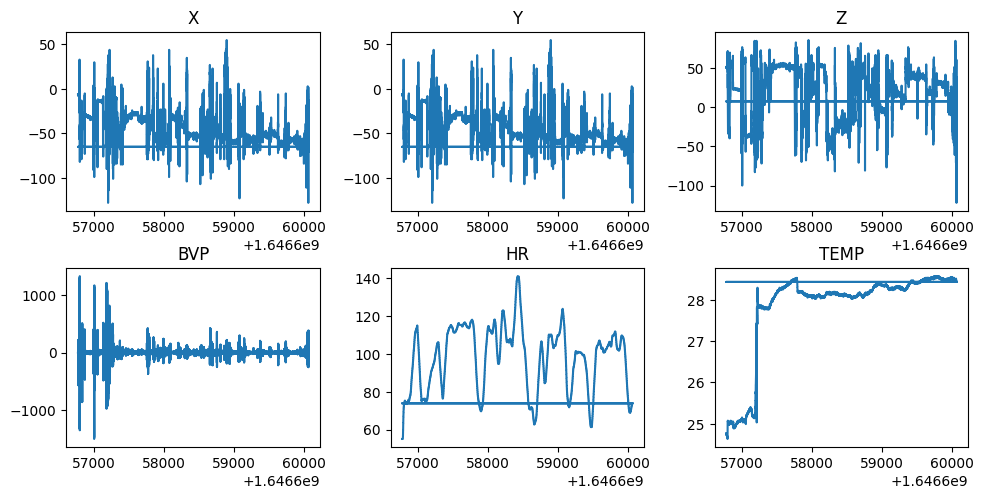

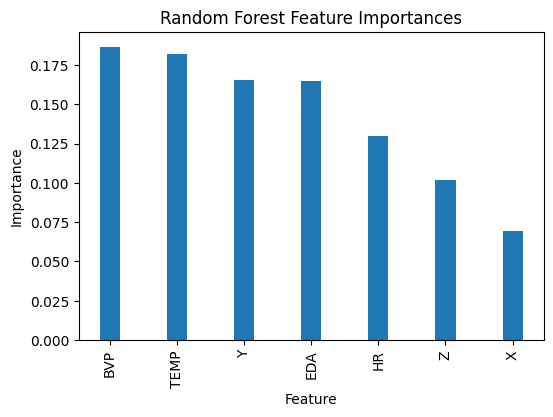


Accuracy Scores:  [0.43755633 0.59108265 0.69121309 0.55913672 0.5550338 ]
Mean Accuracy:  0.5668045176979722
Mean squared error: 0.19949722525257316
F1 score: 0.7080788450860632
Precision: 0.8218802867961008
Accuracy: 0.8005027747474268
Confusion matrix:
[[23552  2211]
 [ 6201 10202]]



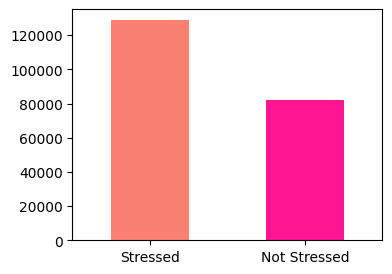

In [ ]:
analyse_data(df_29,'S29',29)


X        0.120189
Y       -0.129433
Z        0.063236
BVP      0.000022
EDA     -0.156665
HR       0.027445
TEMP     0.399889
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.348851
6    TEMP    0.282553
4     EDA    0.132487
1       Y    0.069396
5      HR    0.063522
0       X    0.061675
2       Z    0.041516


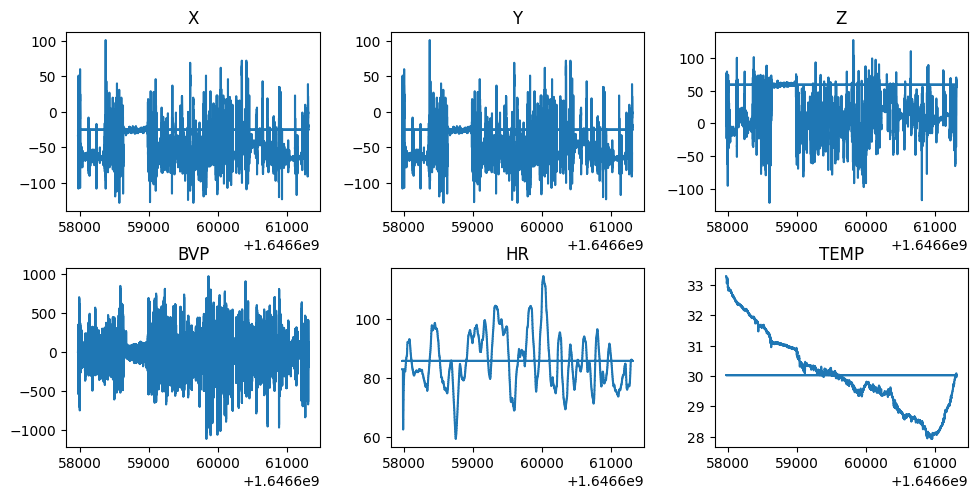

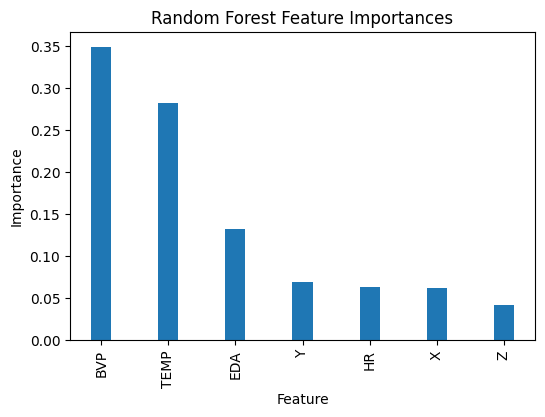


Accuracy Scores:  [0.61285564 0.49010654 0.44830816 0.52757288 0.50406276]
Mean Accuracy:  0.5165811965811966
Mean squared error: 0.20531553682238612
F1 score: 0.8331811263318113
Precision: 0.813735691987513
Accuracy: 0.7946844631776139
Confusion matrix:
[[12041  5012]
 [ 3756 21896]]



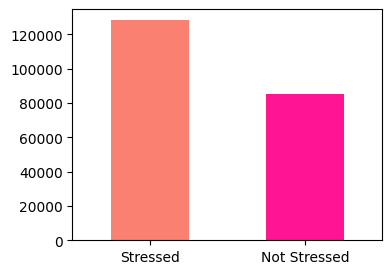

In [ ]:
analyse_data(df_30,'S30',30)


X        0.112250
Y        0.088670
Z        0.150366
BVP      0.000189
EDA      0.137120
HR       0.135789
TEMP     0.417603
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.324107
4     EDA    0.190929
6    TEMP    0.183469
1       Y    0.092970
0       X    0.086779
5      HR    0.062042
2       Z    0.059706


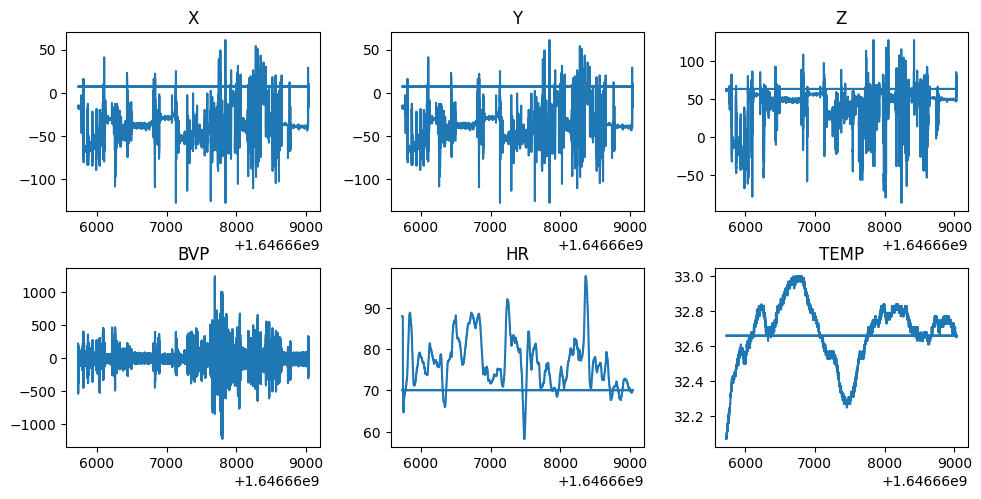

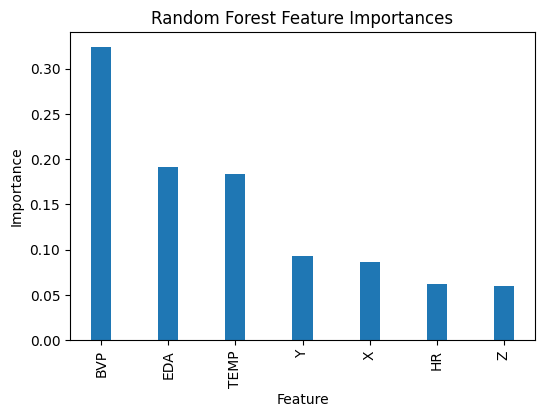


Accuracy Scores:  [0.78632681 0.69936215 0.57793527 0.53794    0.53822348]
Mean Accuracy:  0.6279575415695469
Mean squared error: 0.20552313907065745
F1 score: 0.7234583598219961
Precision: 0.758616092260516
Accuracy: 0.7944768609293426
Confusion matrix:
[[22251  3621]
 [ 5079 11380]]



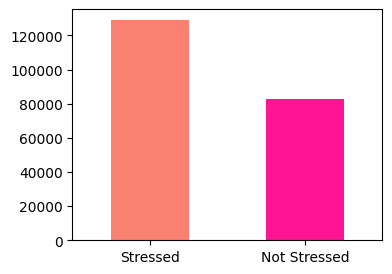

In [ ]:
analyse_data(df_31,'S31',31)


X       -0.167951
Y       -0.082170
Z       -0.165048
BVP      0.000866
EDA      0.017722
HR      -0.084848
TEMP     0.299848
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.255969
4     EDA    0.185208
6    TEMP    0.132117
0       X    0.121827
2       Z    0.116820
1       Y    0.094405
5      HR    0.093653


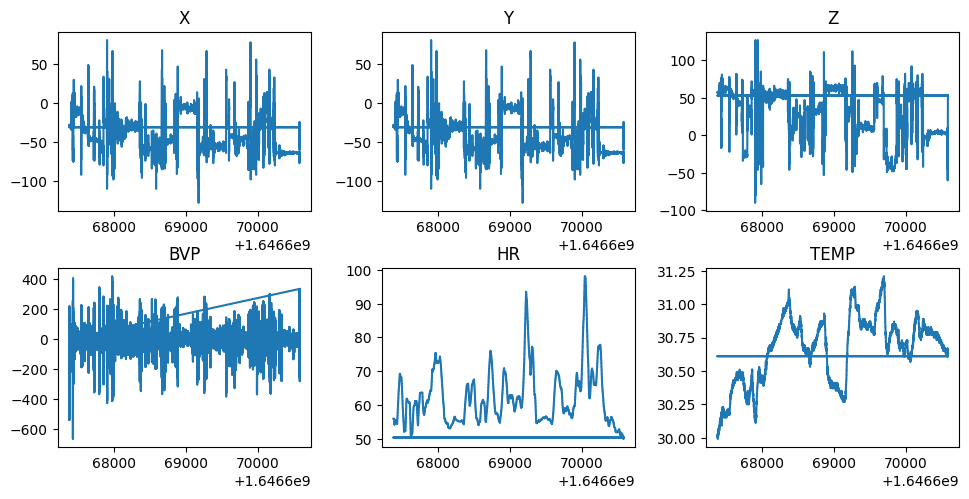

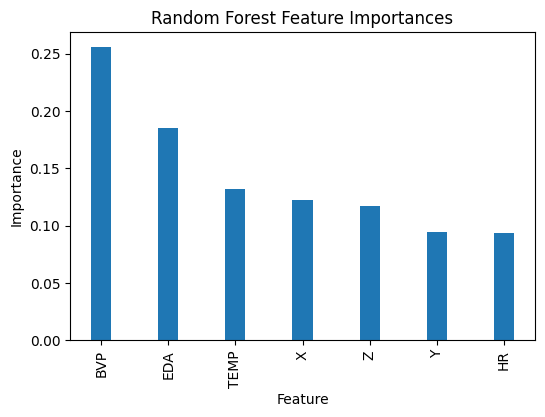


Accuracy Scores:  [0.71477973 0.70847235 0.55512262 0.53012518 0.5317325 ]
Mean Accuracy:  0.6080464742355826
Mean squared error: 0.21096851179894308
F1 score: 0.723359412422162
Precision: 0.7755940560158872
Accuracy: 0.789031488201057
Confusion matrix:
[[21074  3277]
 [ 5386 11326]]



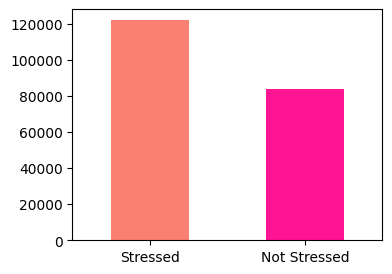

In [ ]:
analyse_data(df_32,'S32',32)


X        0.015384
Y       -0.049483
Z        0.141758
BVP      0.000148
EDA      0.199739
HR      -0.082893
TEMP    -0.022218
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
4     EDA    0.214291
3     BVP    0.213795
6    TEMP    0.138640
1       Y    0.136582
2       Z    0.126961
0       X    0.090251
5      HR    0.079480


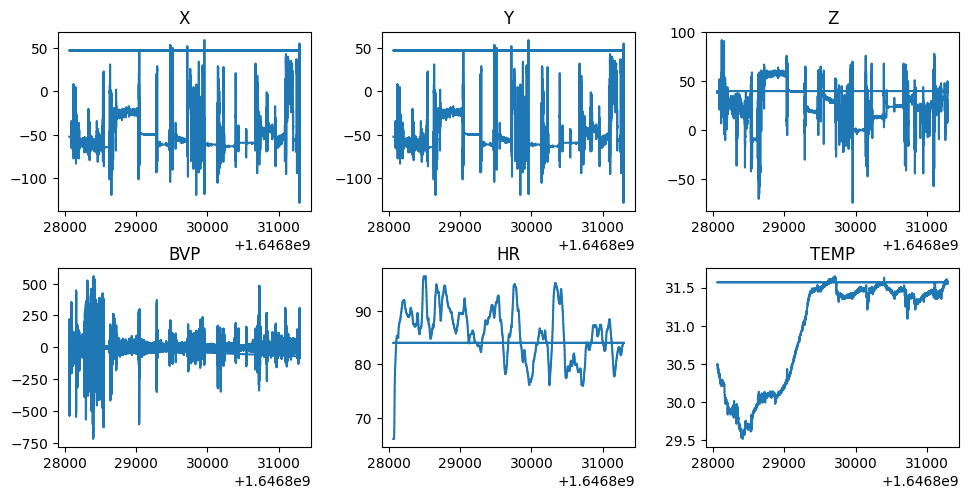

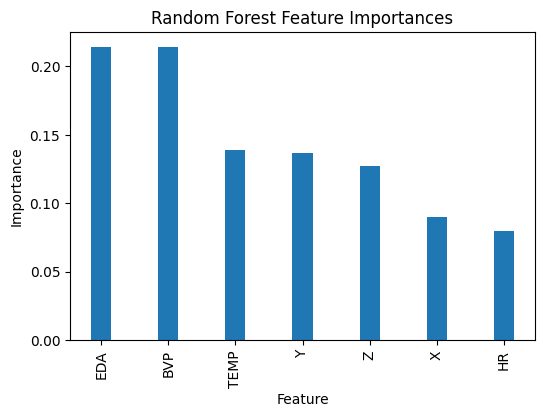


Accuracy Scores:  [0.84657349 0.67064958 0.6236663  0.57997393 0.55887607]
Mean Accuracy:  0.6559478722393324
Mean squared error: 0.19134863736210683
F1 score: 0.6992449823576279
Precision: 0.7878088398734718
Accuracy: 0.8086513626378932
Confusion matrix:
[[24285  2482]
 [ 5445  9215]]



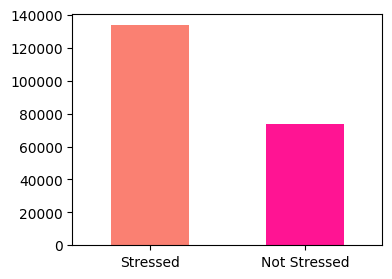

In [ ]:
analyse_data(df_33,'S33',33)


X        0.222695
Y        0.239651
Z        0.363353
BVP     -0.000332
EDA      0.261259
HR      -0.076322
TEMP     0.260078
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
2       Z    0.209478
3     BVP    0.188415
0       X    0.173309
4     EDA    0.166602
5      HR    0.092047
1       Y    0.089924
6    TEMP    0.080225


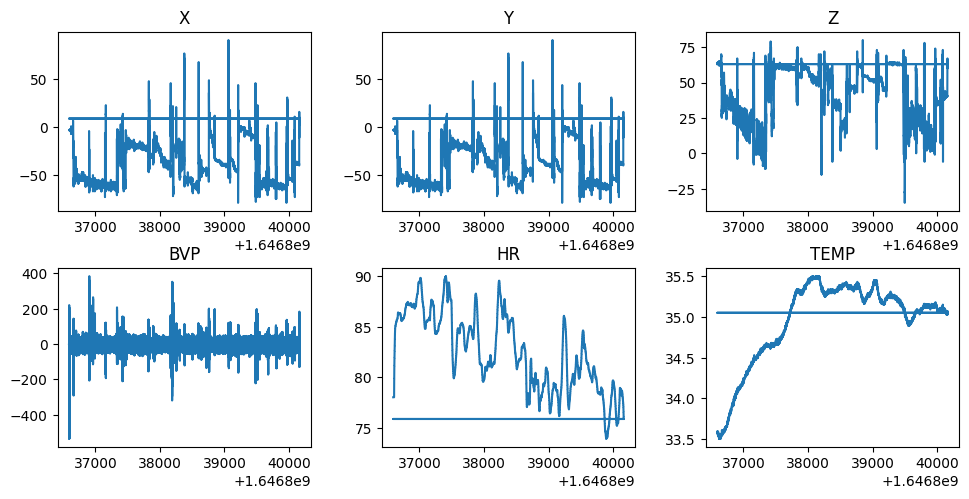

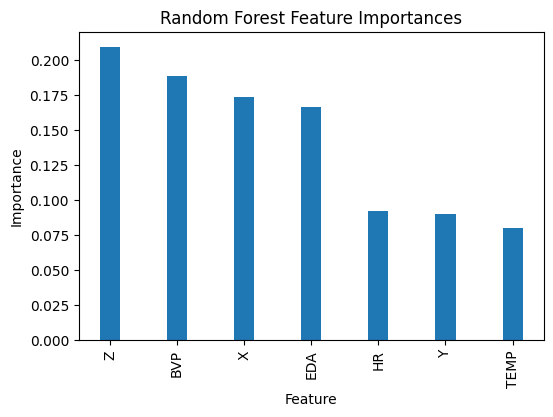


Accuracy Scores:  [0.66949004 0.66080105 0.65878748 0.58041147 0.57386737]
Mean Accuracy:  0.6286714817246662
Mean squared error: 0.20008754650908295
F1 score: 0.684910732749707
Precision: 0.7886966185108747
Accuracy: 0.799912453490917
Confusion matrix:
[[26612  2662]
 [ 6480  9936]]



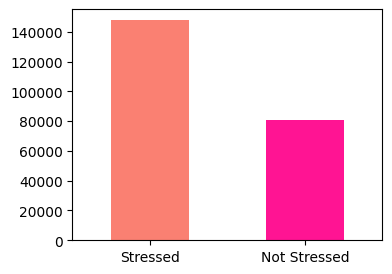

In [ ]:
analyse_data(df_34,'S34',34)


X       -0.024687
Y       -0.082759
Z       -0.042541
BVP      0.000411
EDA      0.086224
HR      -0.150364
TEMP    -0.164201
Label    1.000000
Name: Label, dtype: float64

feature importances
  Feature  Importance
3     BVP    0.312460
6    TEMP    0.205111
4     EDA    0.141394
5      HR    0.105365
2       Z    0.085041
1       Y    0.075361
0       X    0.075267


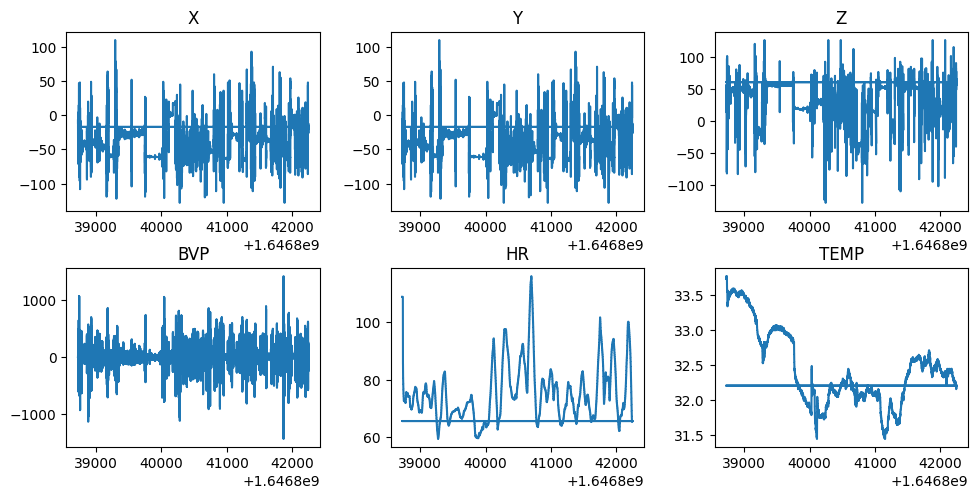

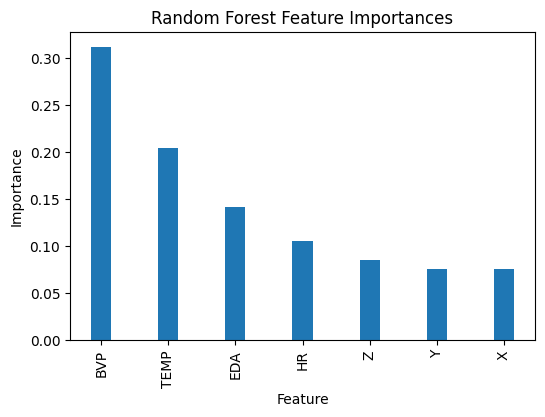


Accuracy Scores:  [0.46466662 0.62888312 0.58861616 0.53296082 0.55063305]
Mean Accuracy:  0.5531519545887935
Mean squared error: 0.20426173529346547
F1 score: 0.7322248706470554
Precision: 0.7630558584757058
Accuracy: 0.7957382647065345
Confusion matrix:
[[23292  3911]
 [ 5301 12595]]



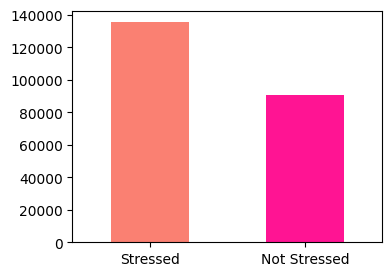

In [ ]:
analyse_data(df_35,'S35',35)

In [ ]:
print (data)

{'ID': [2, 3, 4, 5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'Subject_ID': ['S2', 'S3', 'S4', 'S5', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35'], 'MSE': [0.22044000350600404, 0.22737545908277615, 0.23382700244995255, 0.1946801411002002, 0.22070295380839688, 0.22139561163951407, 0.23369457258260312, 0.1928448851177424, 0.23123455337177828, 0.20147459899228032, 0.20746795190301104, 0.2100191260850375, 0.21147515687686452, 0.2070723919363294, 0.1978540872858178, 0.20845787408929572, 0.19491784653032687, 0.19307914709071197, 0.20071180831047536, 0.0, 0.19450403980462866, 0.22307297145233493, 0.2051158190141007, 0.21285558649073963, 0.2135570743649903, 0.2249171703887301, 0.2086670480549199, 0.196537554404649, 0.2091049382

In [ ]:
df = pd.DataFrame(data)
#df_score = pd.DataFrame(data['Accuracy Scores'])
#print (df_score)
pivot_df = pd.pivot_table(df, values=['MSE', 'F1 Score', 'Precision', 'Accuracy','Accuracy Scores','Mean Accuracy'], index=['ID','Subject_ID'])
print(pivot_df)
pivot_df.to_csv('Performance_Evaluation.csv')

               Accuracy  F1 Score       MSE  Mean Accuracy  Precision
ID Subject_ID                                                        
2  S2          0.779429  0.785724  0.220571       0.484974   0.778879
3  S3          0.775614  0.797916  0.224386       0.446395   0.784859
4  S4          0.766239  0.771312  0.233761       0.521873   0.766281
5  S5          0.806237  0.712103  0.193763       0.655772   0.777374
6  S6          0.768765  0.780704  0.231235       0.558661   0.759875
7  S7          0.798525  0.700065  0.201475       0.553368   0.754898
8  S8          0.792532  0.700906  0.207468       0.512279   0.785313
9  S9          0.789981  0.728775  0.210019       0.488287   0.759839
10 S10         0.788525  0.721226  0.211475       0.494828   0.771748
11 S11         0.792928  0.718533  0.207072       0.519080   0.778277
12 S12         0.802146  0.700326  0.197854       0.607914   0.803869
13 S13         0.791542  0.739106  0.208458       0.487253   0.761518
14 S14         0.805

<ipython-input-82-86a974c908e7>:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_df = pd.pivot_table(df, values=['MSE', 'F1 Score', 'Precision', 'Accuracy','Accuracy Scores','Mean Accuracy'], index=['ID','Subject_ID'])
